# Imports

In [1]:
!pip3 list | grep "matplotlib"

matplotlib                         3.4.3
matplotlib-inline                  0.1.2


In [2]:
import matplotlib.pyplot as plt

In [3]:
from utils.utils import grab_data
from utils.graph_position_stats import graph_stat

# Table of Contents

[Go to QBs](#QBs)

[Go to RBs](#RBs)

[Go to WRs](#WRs)

[Go to TEs](#TEs)

# Grabbing Season Data

Grabbing the fantasy stats by season from 2010-to-2022.

In [4]:
seasons = grab_data(by_position=True, by_player=False)

In [5]:
seasons_dict = dict()
for year, season in seasons:
    seasons_dict[year] = season

seasons_dict["2010"].keys()

dict_keys(['RB', 'WR', 'QB', 'TE'])

# Analyzing 2022

## QBs

Return to [top](#Table-of-Contents).

In [15]:
qbs = seasons_dict["2022"]["QB"][:50]
qbs.reverse()

In [19]:
f"this position: {qbs[0].position}"

'this position: QB'

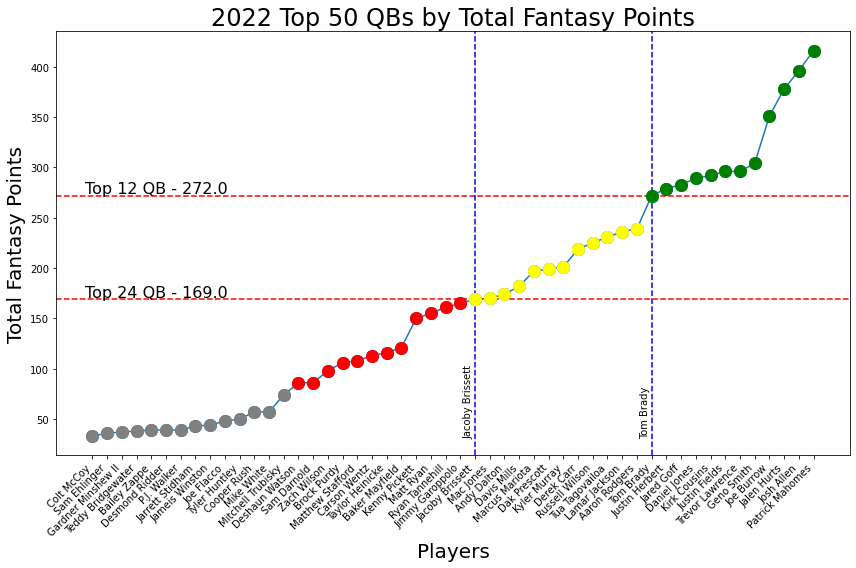

<Figure size 432x288 with 0 Axes>

In [11]:
graph_stat(position_group=qbs, stat_to_show="Total Fantasy Points", break_one=12, break_two=24, show_tier_1=True, show_tier_2=True, show_tier_3=True)

<Figure size 432x288 with 0 Axes>

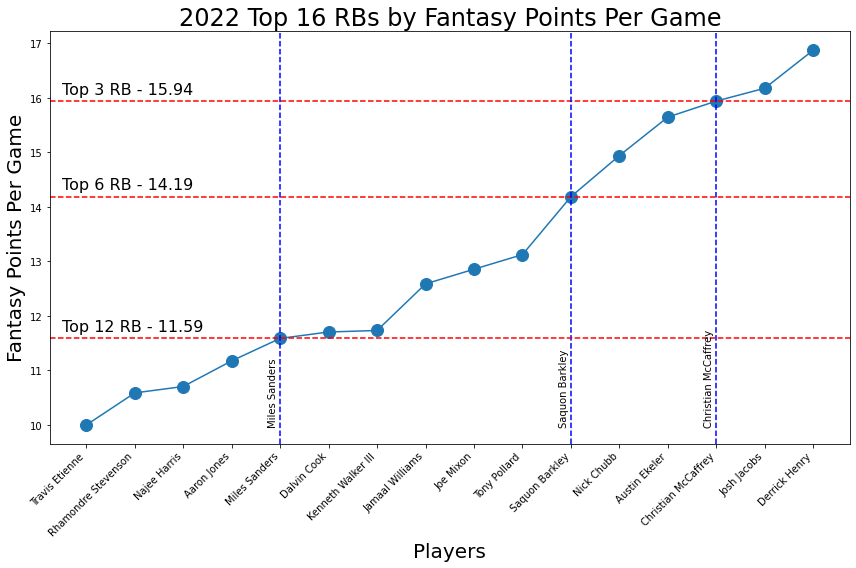

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [9]:
rbs = seasons_dict["2022"]["RB"][:16]
rbs.reverse()

graph_stat(rbs, stat_to_show="Fantasy Points Per Game", break_one=3, break_two=6, break_three=12)

In [ ]:
# graphing stat and name
fantasy_points = [p.fantasy_points for p in qbs]
names = [p.player_name for p in qbs]

highlight_names_ppr_total_qb1 = names[-12:]

# creating graph
plt.figure(figsize=(12,8)) # Increase figure size

plt.xticks(range(len(names)), names, rotation=45, ha='right') # Rotate x-tick labels
plt.plot(names, fantasy_points, 'o-', markersize=12) # Use circles and increase size 

# top 3 qb theshold
plt.axhline(y=qbs[-3].fantasy_points, color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=qbs[-3].fantasy_points + 5, s=f"Top 3 Qb - {round(qbs[-3].fantasy_points, 2)}", color='Black', fontsize=16)

# top 3 qb vertical threshold 
plt.axvline(x=len(qbs) - 3, color='b', linestyle='--') 
plt.text(x=(len(qbs) - 3) - 0.5, y=150, s=qbs[len(qbs) - 3].player_name, rotation=90, color='black')

# top 5 qb horizontal threshold
plt.axhline(y=qbs[-5].fantasy_points, color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=qbs[-5].fantasy_points + 5, s=f"Top 5 Qb - {round(qbs[-5].fantasy_points, 2)}", color='Black', fontsize=16)

# top 5 qb vertical threshold 
plt.axvline(x=len(qbs) - 5, color='b', linestyle='--') 
plt.text(x=(len(qbs) - 5) - 0.5, y=150, s=qbs[len(qbs) - 5].player_name, rotation=90, color='black')

# top 12 qb horizontal threshold 
plt.axhline(y=qbs[-12].fantasy_points, color='r', linestyle='--') # Add threshold line at 250
plt.text(x=-0.5, y=qbs[-12].fantasy_points + 5, s=f"Top 12 Qb - {round(qbs[-12].fantasy_points, 2)}", color='Black', fontsize=16)

# top 12 qb vertical threshold 
plt.axvline(x=len(qbs) - 12, color='b', linestyle='--') 
plt.text(x=(len(qbs) - 12) - 0.5, y=150, s=qbs[len(qbs) - 12].player_name, rotation=90, color='black')

plt.xlabel("Player", fontsize=20) 
plt.ylabel("Fantasy Points (Season)", fontsize=20)
plt.title("2022 Top 32 QBs by Fantasy Points", fontsize=16)

# Labeling interesting points

print(150/fantasy_points[-1])

# number 1 stat
plt.text(len(qbs) - 1, fantasy_points[-1] + 7, round(fantasy_points[-1], 2), ha='center', fontsize=16)

# burrow at #4
plt.text(len(qbs) - 4, fantasy_points[-4] + 7, round(fantasy_points[-4], 2), ha='center', fontsize=16) 

plt.tight_layout()
plt.show()

In [ ]:
VERTICAL_THRESHOLD_POS = 10

# graphing stat and name
fantasy_points_per_game = [p.fantasy_points / p.games for p in qbs]
names = [p.player_name for p in qbs]

# creating graph
plt.figure(figsize=(12,8)) # Increase figure size

plt.xticks(range(len(names)), names, rotation=45, ha='right') # Rotate x-tick labels
plt.plot(names, fantasy_points_per_game, 'o-', markersize=12) # Use circles and increase size 


# top 3 qb theshold
plt.axhline(y=qbs[-3].fantasy_points / qbs[-3].games, color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=qbs[-3].fantasy_points / qbs[-3].games + .2, s="Top 3 Qb", color='Black', fontsize=16)

# top 3 qb vertical threshold 
plt.axvline(x=len(qbs) - 3, color='b', linestyle='--') 
plt.text(x=(len(qbs) - 3) - 0.5, y=VERTICAL_THRESHOLD_POS, s=qbs[len(qbs) - 3].player_name, rotation=90, color='black')

# top 5 qb horizontal threshold
plt.axhline(y=qbs[-5].fantasy_points / qbs[-5].games, color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=qbs[-5].fantasy_points / qbs[-5].games + .2, s="Top 5 Qb", color='Black', fontsize=16)

# top 5 qb vertical threshold 
plt.axvline(x=len(qbs) - 5, color='b', linestyle='--') 
plt.text(x=(len(qbs) - 5) - 0.5, y=VERTICAL_THRESHOLD_POS, s=qbs[len(qbs) - 5].player_name, rotation=90, color='black')

# top 12 qb horizontal threshold 
plt.axhline(y=qbs[-12].fantasy_points / qbs[-12].games, color='r', linestyle='--') # Add threshold line at 250
plt.text(x=-0.5, y=qbs[-12].fantasy_points / qbs[-12].games + .2, s="Top 12 Qb", color='Black', fontsize=16)

# top 12 qb vertical threshold 
plt.axvline(x=len(qbs) - 12, color='b', linestyle='--') 
plt.text(x=(len(qbs) - 12) - 0.5, y=VERTICAL_THRESHOLD_POS, s=qbs[len(qbs) - 12].player_name, rotation=90, color='black')

plt.xlabel("Player", fontsize=20) 
plt.ylabel("Fantasy Points (Game)", fontsize=20)
plt.title("2022 Top 32 QBs by Fantasy Points Per Game", fontsize=16)

plt.tight_layout()
plt.show()

In [ ]:
VERTICAL_THRESHOLD_POS = 10

# graphing stat and name
data = [(p.fantasy_points / p.games, p.player_name) for p in qbs]
data.sort()
fantasy_points_per_game = [stat for stat, name in data]
names = [name for stat, name in data]

# creating graph
plt.figure(figsize=(12,8)) # Increase figure size

plt.xticks(range(len(names)), names, rotation=45, ha='right') # Rotate x-tick labels
plt.plot(names, fantasy_points_per_game, 'o-', markersize=12) # Use circles and increase size 


# top 3 qb theshold
plt.axhline(y=fantasy_points_per_game[-3], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=fantasy_points_per_game[-3] + .2, s=f"Top 3 Qb - {round(fantasy_points_per_game[-3], 2)}", color='Black', fontsize=16)

print(.2 / fantasy_points_per_game[-3])
print(.5 / (len(qbs)))

# top 3 qb vertical threshold 
plt.axvline(x=len(qbs) - 3, color='b', linestyle='--') 
plt.text(x=(len(qbs) - 3) - 0.5, y=VERTICAL_THRESHOLD_POS, s=names[-3], rotation=90, color='black')

# top 5 qb horizontal threshold
plt.axhline(y=fantasy_points_per_game[-5], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=fantasy_points_per_game[-5] + .2, s=f"Top 5 Qb - {round(fantasy_points_per_game[-5], 2)}", color='Black', fontsize=16)

# top 5 qb vertical threshold 
plt.axvline(x=len(qbs) - 5, color='b', linestyle='--') 
plt.text(x=(len(qbs) - 5) - 0.5, y=VERTICAL_THRESHOLD_POS, s=names[-5], rotation=90, color='black')

# top 12 qb horizontal threshold 
plt.axhline(y=fantasy_points_per_game[-12], color='r', linestyle='--') # Add threshold line at 250
plt.text(x=-0.5, y=fantasy_points_per_game[-12] + .2, s=f"Top 12 Qb - {round(fantasy_points_per_game[-12], 2)}", color='Black', fontsize=16)

# top 12 qb vertical threshold 
plt.axvline(x=len(qbs) - 12, color='b', linestyle='--') 
plt.text(x=(len(qbs) - 12) - 0.5, y=VERTICAL_THRESHOLD_POS, s=names[-12], rotation=90, color='black')


plt.xlabel("Player", fontsize=20) 
plt.ylabel("Fantasy Points (Game)", fontsize=20)
plt.title("2022 Top 32 QBs by Fantasy Points Per Game", fontsize=16)

# Labeling interesting points

# number 1 stat
plt.text(len(qbs) - 1, fantasy_points_per_game[-1] + 0.3, round(fantasy_points_per_game[-1], 2), ha='center', fontsize=16)

# burrow at #4
plt.text(len(qbs) - 4, fantasy_points_per_game[-4] + 0.3, f"{names[-4]} - {round(fantasy_points_per_game[-4], 2)}", ha='center', fontsize=16) 

# Plotting each point individually for highlighting tier 1 and tier 2
for i, (name, s) in enumerate(zip(names, fantasy_points_per_game)):
    if name in highlight_names_ppr_total_qb1:
        color = 'red'
        label = 'QB 1' if 'QB 1' not in plt.gca().get_legend_handles_labels()[1] else ""
    else:
        color = 'blue'
        label = 'Others' if 'Others' not in plt.gca().get_legend_handles_labels()[1] else ""
        
    plt.plot(i, s, 'o-', color=color, markersize=12, label=label)

plt.tight_layout()
plt.show()

In [ ]:
VERTICAL_THRESHOLD_POS = 10

# graphing stat and name
data = [(p.passing_yards, p.player_name) for p in qbs]
data.sort()
stat = [stat for stat, name in data]
names = [name for stat, name in data]

# creating graph
plt.figure(figsize=(12,8)) # Increase figure size

plt.xticks(range(len(names)), names, rotation=45, ha='right') # Rotate x-tick labels
plt.plot(names, stat, 'o-', markersize=12) # Use circles and increase size 


# top 3 qb theshold
plt.axhline(y=stat[-3], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-3] + .2, s=f"Top 3 Qb - {round(stat[-3], 2)}", color='Black', fontsize=16)

# top 3 qb vertical threshold 
plt.axvline(x=len(qbs) - 3, color='b', linestyle='--') 
plt.text(x=(len(qbs) - 3) - 0.5, y=VERTICAL_THRESHOLD_POS, s=names[-3], rotation=90, color='black')

# top 5 qb horizontal threshold
plt.axhline(y=stat[-5], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-5] + .2, s=f"Top 5 Qb - {round(stat[-5], 2)}", color='Black', fontsize=16)

# top 5 qb vertical threshold 
plt.axvline(x=len(qbs) - 5, color='b', linestyle='--') 
plt.text(x=(len(qbs) - 5) - 0.5, y=VERTICAL_THRESHOLD_POS, s=names[-5], rotation=90, color='black')

# top 12 qb horizontal threshold 
plt.axhline(y=stat[-12], color='r', linestyle='--') # Add threshold line at 250
plt.text(x=-0.5, y=stat[-12] + .2, s=f"Top 12 Qb - {round(stat[-12], 2)}", color='Black', fontsize=16)

# top 12 qb vertical threshold 
plt.axvline(x=len(qbs) - 12, color='b', linestyle='--') 
plt.text(x=(len(qbs) - 12) - 0.5, y=VERTICAL_THRESHOLD_POS, s=names[-12], rotation=90, color='black')

plt.xlabel("Player", fontsize=20) 
plt.ylabel("Yards (Season)", fontsize=20)
plt.title("2022 Top 32 QBs by Passing Yards", fontsize=16)

# Labeling interesting points

# number 1 stat
plt.text(len(qbs) - 1, stat[-1] + 0.3, round(stat[-1], 2), ha='center', fontsize=16)

# burrow at #4
plt.text(len(qbs) - 4, stat[-4] + 0.3, f"{names[-4]} - {round(stat[-4], 2)}", ha='center', fontsize=16) 

# Plotting each point individually for highlighting tier 1 and tier 2
for i, (name, s) in enumerate(zip(names, stat)):
    if name in highlight_names_ppr_total_qb1:
        color = 'red'
        label = 'QB 1' if 'QB 1' not in plt.gca().get_legend_handles_labels()[1] else ""
    else:
        color = 'blue'
        label = 'Others' if 'Others' not in plt.gca().get_legend_handles_labels()[1] else ""
        
    plt.plot(i, s, 'o-', color=color, markersize=12, label=label)

plt.tight_layout()
plt.show()

In [ ]:
VERTICAL_THRESHOLD_POS = 10

# graphing stat and name
data = [(p.passing_yards, p.player_name) for p in qbs]
data.sort()
data = data[-16:]
stat = [stat for stat, name in data]
names = [name for stat, name in data]

# creating graph
plt.figure(figsize=(12,8)) # Increase figure size

plt.xticks(range(len(names)), names, rotation=45, ha='right') # Rotate x-tick labels
plt.plot(names, stat, 'o-', markersize=12) # Use circles and increase size 


# top 3 qb theshold
plt.axhline(y=stat[-3], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-3] + 15, s=f"Top 3 Qb - {round(stat[-3], 2)}", color='Black', fontsize=16)

# top 5 qb horizontal threshold
plt.axhline(y=stat[-5], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-5] + 15, s=f"Top 5 Qb - {round(stat[-5], 2)}", color='Black', fontsize=16)

# top 12 qb horizontal threshold 
plt.axhline(y=stat[-12], color='r', linestyle='--') # Add threshold line at 250
plt.text(x=-0.5, y=stat[-12] + 15, s=f"Top 12 Qb - {round(stat[-12], 2)}", color='Black', fontsize=16)

plt.xlabel("Player", fontsize=20) 
plt.ylabel("Yards (Season)", fontsize=20)
plt.title("2022 Top 16 QBs by Passing Yards", fontsize=16)

# Plotting each point individually for highlighting tier 1 and tier 2
for i, (name, s) in enumerate(zip(names, stat)):
    if name in highlight_names_ppr_total_qb1:
        color = 'red'
        label = 'QB 1' if 'QB 1' not in plt.gca().get_legend_handles_labels()[1] else ""
    else:
        color = 'blue'
        label = 'Others' if 'Others' not in plt.gca().get_legend_handles_labels()[1] else ""
        
    plt.plot(i, s, 'o-', color=color, markersize=12, label=label)

plt.tight_layout()
plt.show()

## RBs

Return to [top](#Table-of-Contents).

In [ ]:
rbs = seasons_dict["2022"]["RB"][:48]
rbs.reverse()

### Standard

In [ ]:
# graphing stat and name
data = [(p.fantasy_points, p.player_name) for p in rbs]
data.sort()
stat = [stat for stat, name in data]
names = [name for stat, name in data]

# creating graph
plt.figure(figsize=(14,10)) # Increase figure size

plt.xticks(range(len(names)), names, rotation=45, ha='right') # Rotate x-tick labels
plt.plot(names, stat, 'o-', markersize=12) # Use circles and increase size 

# top 6 horizontal theshold
plt.axhline(y=stat[-6], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-6] + 3, s=f"Top 6 Rb - {round(stat[-6], 2)}", color='Black', fontsize=16)

# top 6 vertical threshold 
plt.axvline(x=len(data) - 6, color='b', linestyle='--') 
plt.text(x=(len(data) - 6) - .8, y=80, s=names[-6], rotation=90, color='black')

# top 12 horizontal threshold
plt.axhline(y=stat[-12], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-12] + 3, s=f"Top 12 Rb - {round(stat[-12], 2)}", color='Black', fontsize=16)

# top 12 vertical threshold 
plt.axvline(x=len(data) - 12, color='b', linestyle='--') 
plt.text(x=(len(data) - 12) - 0.8, y=80, s=names[-12], rotation=90, color='black')

# top 24 horizontal threshold 
plt.axhline(y=stat[-24], color='r', linestyle='--') # Add threshold line at 250
plt.text(x=-0.5, y=stat[-24] + 3, s=f"Top 24 Rb - {round(stat[-24], 2)}", color='Black', fontsize=16)

# top 24 vertical threshold 
plt.axvline(x=len(data) - 24, color='b', linestyle='--') 
plt.text(x=(len(data) - 24) - 0.8, y=80, s=names[-24], rotation=90, color='black')

plt.xlabel("Player", fontsize=20) 
plt.ylabel("Fantasy Points (Season)", fontsize=20)
plt.title("2022 Top 48 RBs by Fantasy Points", fontsize=16)

# Labeling interesting points

# number 1 stat
plt.text(len(data) - 1, stat[-1] + 5, round(stat[-1], 2), ha='center', fontsize=16)

# number 6
plt.text(len(data) - 6, stat[-6] + 5, f"{names[-6]} - {round(stat[-6], 2)}", ha='center', fontsize=16) 

plt.tight_layout()
plt.show()

In [ ]:
# graphing stat and name
data = [(p.fantasy_points / p.games, p.player_name) for p in rbs]
data.sort()
stat = [stat for stat, name in data]
names = [name for stat, name in data]

# creating graph
plt.figure(figsize=(14, 10)) # Increase figure size

plt.xticks(range(len(names)), names, rotation=45, ha='right') # Rotate x-tick labels
plt.plot(names, stat, 'o-', markersize=12) # Use circles and increase size 

# top 6 horizontal theshold
plt.axhline(y=stat[-6], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-6] + .2, s=f"Top 6 Rb - {round(stat[-6], 2)}", color='Black', fontsize=16)

# top 6 vertical threshold 
plt.axvline(x=len(data) - 6, color='b', linestyle='--') 
plt.text(x=(len(data) - 6) - .8, y=5, s=names[-6], rotation=90, color='black')

# top 12 horizontal threshold
plt.axhline(y=stat[-12], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-12] + .2, s=f"Top 12 Rb - {round(stat[-12], 2)}", color='Black', fontsize=16)

# top 12 vertical threshold 
plt.axvline(x=len(data) - 12, color='b', linestyle='--') 
plt.text(x=(len(data) - 12) - 0.8, y=5, s=names[-12], rotation=90, color='black')

# top 24 horizontal threshold 
plt.axhline(y=stat[-24], color='r', linestyle='--') # Add threshold line at 250
plt.text(x=-0.5, y=stat[-24] + .2, s=f"Top 24 Rb - {round(stat[-24], 2)}", color='Black', fontsize=16)

# top 24 vertical threshold 
plt.axvline(x=len(data) - 24, color='b', linestyle='--') 
plt.text(x=(len(data) - 24) - 0.8, y=5, s=names[-24], rotation=90, color='black')

plt.xlabel("Player", fontsize=20) 
plt.ylabel("Fantasy Points (Game)", fontsize=20)
plt.title("2022 Top 48 RBs by Fantasy Points Per Game", fontsize=16)

# Labeling interesting points

# number 1 stat
plt.text(len(data) - 1, stat[-1] + .2, round(stat[-1], 2), ha='center', fontsize=16)

# number 6
# plt.text(len(data) - 6, stat[-6] + .2, f"{names[-6]} - {round(stat[-6], 2)}", ha='center', fontsize=16) 

plt.tight_layout()
plt.show()

### PPR

In [ ]:
# graphing stat and name
data = [(p.fantasy_ppr, p.player_name) for p in rbs]
data.sort()
stat = [stat for stat, name in data]
names = [name for stat, name in data]

highlight_names_ppr_total_rb1 = names[-12:]
highlight_names_ppr_total_rb2 = names[-24:-12]

# creating graph
plt.figure(figsize=(14,10)) # Increase figure size

plt.xticks(range(len(names)), names, rotation=45, ha='right') # Rotate x-tick labels
plt.plot(names, stat, 'o-', markersize=12) # Use circles and increase size 

# top 6 horizontal theshold
plt.axhline(y=stat[-6], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-6] + 3, s=f"Top 6 Rb - {round(stat[-6], 2)}", color='Black', fontsize=16)

# top 6 vertical threshold 
plt.axvline(x=len(data) - 6, color='b', linestyle='--') 
plt.text(x=(len(data) - 6) - .8, y=80, s=names[-6], rotation=90, color='black')

# top 12 horizontal threshold
plt.axhline(y=stat[-12], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-12] + 3, s=f"Top 12 Rb - {round(stat[-12], 2)}", color='Black', fontsize=16)

# top 12 vertical threshold 
plt.axvline(x=len(data) - 12, color='b', linestyle='--') 
plt.text(x=(len(data) - 12) - 0.8, y=80, s=names[-12], rotation=90, color='black')

# top 24 horizontal threshold 
plt.axhline(y=stat[-24], color='r', linestyle='--') # Add threshold line at 250
plt.text(x=-0.5, y=stat[-24] + 3, s=f"Top 24 Rb - {round(stat[-24], 2)}", color='Black', fontsize=16)

# top 24 vertical threshold 
plt.axvline(x=len(data) - 24, color='b', linestyle='--') 
plt.text(x=(len(data) - 24) - 0.8, y=80, s=names[-24], rotation=90, color='black')

# top 36 horizontal threshold 
plt.axhline(y=stat[-36], color='r', linestyle='--') # Add threshold line at 250
plt.text(x=-0.5, y=stat[-36] + 3, s=f"Top 36 Rb - {round(stat[-36], 2)}", color='Black', fontsize=16)

# top 36 vertical threshold 
plt.axvline(x=len(data) - 36, color='b', linestyle='--') 
plt.text(x=(len(data) - 36) - 0.8, y=80, s=names[-36], rotation=90, color='black')

plt.xlabel("Player", fontsize=20) 
plt.ylabel("Fantasy Points (Season)", fontsize=20)
plt.title("2022 Top 48 RBs by Fantasy Points", fontsize=16)

# Labeling interesting points

# number 1 stat
plt.text(len(data) - 1, stat[-1] + 5, round(stat[-1], 2), ha='center', fontsize=16)

plt.tight_layout()
plt.show()

In [ ]:
# graphing stat and name
data = [(p.fantasy_ppr / p.games, p.player_name) for p in rbs]
data.sort()
stat = [stat for stat, name in data]
names = [name for stat, name in data]

# creating graph
plt.figure(figsize=(14, 10)) # Increase figure size

plt.xticks(range(len(names)), names, rotation=45, ha='right') # Rotate x-tick labels
plt.plot(names, stat, 'o-', markersize=12) # Use circles and increase size 

# top 6 horizontal theshold
plt.axhline(y=stat[-6], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-6] + .2, s=f"Top 6 Rb - {round(stat[-6], 2)}", color='Black', fontsize=16)

# top 6 vertical threshold 
plt.axvline(x=len(data) - 6, color='b', linestyle='--') 
plt.text(x=(len(data) - 6) - .8, y=7, s=names[-6], rotation=90, color='black')

# top 12 horizontal threshold
plt.axhline(y=stat[-12], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-12] + .2, s=f"Top 12 Rb - {round(stat[-12], 2)}", color='Black', fontsize=16)

# top 12 vertical threshold 
plt.axvline(x=len(data) - 12, color='b', linestyle='--') 
plt.text(x=(len(data) - 12) - 0.8, y=7, s=names[-12], rotation=90, color='black')

# top 24 horizontal threshold 
plt.axhline(y=stat[-24], color='r', linestyle='--') # Add threshold line at 250
plt.text(x=-0.5, y=stat[-24] + .2, s=f"Top 24 Rb - {round(stat[-24], 2)}", color='Black', fontsize=16)

# top 24 vertical threshold 
plt.axvline(x=len(data) - 24, color='b', linestyle='--') 
plt.text(x=(len(data) - 24) - 0.8, y=7, s=names[-24], rotation=90, color='black')

# top 36 horizontal threshold 
plt.axhline(y=stat[-36], color='r', linestyle='--') # Add threshold line at 250
plt.text(x=-0.5, y=stat[-36] + .2, s=f"Top 36 Rb - {round(stat[-36], 2)}", color='Black', fontsize=16)

# top 36 vertical threshold 
plt.axvline(x=len(data) - 36, color='b', linestyle='--') 
plt.text(x=(len(data) - 36) - 0.8, y=6, s=names[-36], rotation=90, color='black')

plt.xlabel("Player", fontsize=20) 
plt.ylabel("Fantasy Points (Game)", fontsize=20)
plt.title("2022 Top 48 RBs by Fantasy Points Per Game", fontsize=16)

# Labeling interesting points

# number 1 stat
plt.text(len(data) - 1, stat[-1] + .3, round(stat[-1], 2), ha='center', fontsize=16)


plt.tight_layout()
plt.show()

### Yards Per Carry

In [ ]:
# graphing stat and name
data = [(p.rushing_y_per_attempt, p.player_name) for p in rbs]
data.sort()
stat = [stat for stat, name in data]
names = [name for stat, name in data]

# creating graph
plt.figure(figsize=(14, 10)) # Increase figure size

plt.xticks(range(len(names)), names, rotation=45, ha='right') # Rotate x-tick labels
plt.plot(names, stat, 'o-', markersize=12) # Use circles and increase size 

# top 6 horizontal theshold
plt.axhline(y=stat[-6], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-6] + .02, s=f"Top 6 Rb - {round(stat[-6], 2)}", color='Black', fontsize=16)

# top 6 vertical threshold 
plt.axvline(x=len(data) - 6, color='b', linestyle='--') 
plt.text(x=(len(data) - 6) - .8, y=4, s=names[-6], rotation=90, color='black')

# top 12 horizontal threshold
plt.axhline(y=stat[-12], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-12] + .02, s=f"Top 12 Rb - {round(stat[-12], 2)}", color='Black', fontsize=16)

# top 12 vertical threshold 
plt.axvline(x=len(data) - 12, color='b', linestyle='--') 
plt.text(x=(len(data) - 12) - 0.8, y=4, s=names[-12], rotation=90, color='black')

# top 24 horizontal threshold 
plt.axhline(y=stat[-24], color='r', linestyle='--') # Add threshold line at 250
plt.text(x=-0.5, y=stat[-24] + .02, s=f"Top 24 Rb - {round(stat[-24], 2)}", color='Black', fontsize=16)

# top 24 vertical threshold 
plt.axvline(x=len(data) - 24, color='b', linestyle='--') 
plt.text(x=(len(data) - 24) - 0.8, y=5, s=names[-24], rotation=90, color='black')

# top 36 horizontal threshold 
plt.axhline(y=stat[-36], color='r', linestyle='--') # Add threshold line at 250
plt.text(x=-0.5, y=stat[-36] + .02, s=f"Top 36 Rb - {round(stat[-36], 2)}", color='Black', fontsize=16)

# top 36 vertical threshold 
plt.axvline(x=len(data) - 36, color='b', linestyle='--') 
plt.text(x=(len(data) - 36) - 0.8, y=5, s=names[-36], rotation=90, color='black')

plt.xlabel("Player", fontsize=20) 
plt.ylabel("Yards", fontsize=20)
plt.title("2022 Top 48 RBs by Yards Per Carry", fontsize=16)

# Labeling interesting points

# number 1 stat
plt.text(len(data) - 1, stat[-1] + .05, round(stat[-1], 2), ha='center', fontsize=16)


plt.tight_layout()
plt.show()

In [ ]:
# graphing stat and name
data = [(p.rushing_y_per_attempt, p.player_name) for p in rbs]
data.sort()
stat = [stat for stat, name in data]
names = [name for stat, name in data]  

# creating graph
plt.figure(figsize=(14, 10)) # Increase figure size

plt.xticks(range(len(names)), names, rotation=45, ha='right') # Rotate x-tick labels
plt.plot(names, stat, 'o-', markersize=12) # Use circles and increase size 
    
# top 6 horizontal theshold
plt.axhline(y=stat[-6], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-6] + .02, s=f"Top 6 Rb - {round(stat[-6], 2)}", color='Black', fontsize=16)

# top 6 vertical threshold 
plt.axvline(x=len(data) - 6, color='b', linestyle='--') 
plt.text(x=(len(data) - 6) - .8, y=4, s=names[-6], rotation=90, color='black')

# top 12 horizontal threshold
plt.axhline(y=stat[-12], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-12] + .02, s=f"Top 12 Rb - {round(stat[-12], 2)}", color='Black', fontsize=16)

# top 12 vertical threshold 
plt.axvline(x=len(data) - 12, color='b', linestyle='--') 
plt.text(x=(len(data) - 12) - 0.8, y=4, s=names[-12], rotation=90, color='black')

# top 24 horizontal threshold 
plt.axhline(y=stat[-24], color='r', linestyle='--') # Add threshold line at 250
plt.text(x=-0.5, y=stat[-24] + .02, s=f"Top 24 Rb - {round(stat[-24], 2)}", color='Black', fontsize=16)

# top 24 vertical threshold 
plt.axvline(x=len(data) - 24, color='b', linestyle='--') 
plt.text(x=(len(data) - 24) - 0.8, y=5, s=names[-24], rotation=90, color='black')

# top 36 horizontal threshold 
plt.axhline(y=stat[-36], color='r', linestyle='--') # Add threshold line at 250
plt.text(x=-0.5, y=stat[-36] + .02, s=f"Top 36 Rb - {round(stat[-36], 2)}", color='Black', fontsize=16)

# top 36 vertical threshold 
plt.axvline(x=len(data) - 36, color='b', linestyle='--') 
plt.text(x=(len(data) - 36) - 0.8, y=5, s=names[-36], rotation=90, color='black')

plt.xlabel("Player", fontsize=20) 
plt.ylabel("Yards", fontsize=20)
plt.title("2022 Top 48 RBs by Yards Per Carry", fontsize=16)

# Labeling interesting points

# number 1 stat
plt.text(len(data) - 1, stat[-1] + .05, round(stat[-1], 2), ha='center', fontsize=16)


# Plotting each point individually for highlighting tier 1 and tier 2
for i, (name, s) in enumerate(zip(names, stat)):
    if name in highlight_names_ppr_total_rb1:
        color = 'red'
        label = 'RB 1 PPR' if 'RB 1 PPR' not in plt.gca().get_legend_handles_labels()[1] else ""
    elif name in highlight_names_ppr_total_rb2:
        color = 'yellow'
        label = 'RB 2 PPR' if 'RB 2 PPR' not in plt.gca().get_legend_handles_labels()[1] else ""
    else:
        color = 'blue'
        label = 'Others' if 'Others' not in plt.gca().get_legend_handles_labels()[1] else ""
        
    plt.plot(i, s, 'o-', color=color, markersize=12, label=label)
    
# Add the legend
plt.legend()

plt.tight_layout()
plt.show()

### Carries

In [ ]:
# graphing stat and name
data = [(p.rushing_attempts, p.player_name) for p in rbs]
data.sort()
stat = [stat for stat, name in data]
names = [name for stat, name in data]

colors = ['blue'] * len(stat)

# creating graph
plt.figure(figsize=(14, 10)) # Increase figure size

plt.xticks(range(len(names)), names, rotation=45, ha='right') # Rotate x-tick labels
plt.plot(names, stat, 'o-', markersize=12) # Use circles and increase size 

# top 6 horizontal theshold
plt.axhline(y=stat[-6], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-6] + 2, s=f"Top 6 Rb - {round(stat[-6], 2)}", color='Black', fontsize=16)

# top 6 vertical threshold 
plt.axvline(x=len(data) - 6, color='b', linestyle='--') 
plt.text(x=(len(data) - 6) - .8, y=300, s=names[-6], rotation=90, color='black')

# top 12 horizontal threshold
plt.axhline(y=stat[-12], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-12] + 2, s=f"Top 12 Rb - {round(stat[-12], 2)}", color='Black', fontsize=16)

# top 12 vertical threshold 
plt.axvline(x=len(data) - 12, color='b', linestyle='--') 
plt.text(x=(len(data) - 12) - 0.8, y=300, s=names[-12], rotation=90, color='black')

# top 24 horizontal threshold 
plt.axhline(y=stat[-24], color='r', linestyle='--') # Add threshold line at 250
plt.text(x=-0.5, y=stat[-24] + 2, s=f"Top 24 Rb - {round(stat[-24], 2)}", color='Black', fontsize=16)

# top 24 vertical threshold 
plt.axvline(x=len(data) - 24, color='b', linestyle='--') 
plt.text(x=(len(data) - 24) - 0.8, y=300, s=names[-24], rotation=90, color='black')

# top 36 horizontal threshold 
plt.axhline(y=stat[-36], color='r', linestyle='--') # Add threshold line at 250
plt.text(x=-0.5, y=stat[-36] + 2, s=f"Top 36 Rb - {round(stat[-36], 2)}", color='Black', fontsize=16)

# top 36 vertical threshold 
plt.axvline(x=len(data) - 36, color='b', linestyle='--') 
plt.text(x=(len(data) - 36) - 0.8, y=300, s=names[-36], rotation=90, color='black')

plt.xlabel("Player", fontsize=20) 
plt.ylabel("Attempts", fontsize=20)
plt.title("2022 Top 48 RBs by Rushing Attempts", fontsize=16)

# Labeling interesting points

# number 1 stat
plt.text(len(data) - 1, stat[-1] + 5, round(stat[-1], 2), ha='center', fontsize=16)

# Plotting each point individually for highlighting tier 1 and tier 2
for i, (name, s) in enumerate(zip(names, stat)):
    if name in highlight_names_ppr_total_rb1:
        color = 'red'
        label = 'RB 1 PPR' if 'RB 1 PPR' not in plt.gca().get_legend_handles_labels()[1] else ""
    elif name in highlight_names_ppr_total_rb2:
        color = 'yellow'
        label = 'RB 2 PPR' if 'RB 2 PPR' not in plt.gca().get_legend_handles_labels()[1] else ""
    else:
        color = 'blue'
        label = 'Others' if 'Others' not in plt.gca().get_legend_handles_labels()[1] else ""
        
    plt.plot(i, s, 'o-', color=color, markersize=12, label=label)
    
# Add the legend
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# graphing stat and name
data = [(p.rushing_attempts / p.games, p.player_name) for p in rbs]
data.sort()
stat = [stat for stat, name in data]
names = [name for stat, name in data]

colors = ['blue'] * len(stat)

# creating graph
plt.figure(figsize=(14, 10)) # Increase figure size

plt.xticks(range(len(names)), names, rotation=45, ha='right') # Rotate x-tick labels
plt.plot(names, stat, 'o-', markersize=12) # Use circles and increase size 

# top 6 horizontal theshold
plt.axhline(y=stat[-6], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-6] + .3, s=f"Top 6 Rb - {round(stat[-6], 2)}", color='Black', fontsize=16)

# top 6 vertical threshold 
plt.axvline(x=len(data) - 6, color='b', linestyle='--') 
plt.text(x=(len(data) - 6) - .8, y=5, s=names[-6], rotation=90, color='black')

# top 12 horizontal threshold
plt.axhline(y=stat[-12], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-12] + .3, s=f"Top 12 Rb - {round(stat[-12], 2)}", color='Black', fontsize=16)

# top 12 vertical threshold 
plt.axvline(x=len(data) - 12, color='b', linestyle='--') 
plt.text(x=(len(data) - 12) - 0.8, y=5, s=names[-12], rotation=90, color='black')

# top 24 horizontal threshold 
plt.axhline(y=stat[-24], color='r', linestyle='--') # Add threshold line at 250
plt.text(x=-0.5, y=stat[-24] + .3, s=f"Top 24 Rb - {round(stat[-24], 2)}", color='Black', fontsize=16)

# top 24 vertical threshold 
plt.axvline(x=len(data) - 24, color='b', linestyle='--') 
plt.text(x=(len(data) - 24) - 0.8, y=5, s=names[-24], rotation=90, color='black')

# top 36 horizontal threshold 
plt.axhline(y=stat[-36], color='r', linestyle='--') # Add threshold line at 250
plt.text(x=-0.5, y=stat[-36] + .3, s=f"Top 36 Rb - {round(stat[-36], 2)}", color='Black', fontsize=16)

# top 36 vertical threshold 
plt.axvline(x=len(data) - 36, color='b', linestyle='--') 
plt.text(x=(len(data) - 36) - 0.8, y=5, s=names[-36], rotation=90, color='black')

plt.xlabel("Player", fontsize=20) 
plt.ylabel("Attempts (Game)", fontsize=20)
plt.title("2022 Top 48 RBs by Rushing Attempts Per Game", fontsize=16)

# Labeling interesting points

# number 1 stat
plt.text(len(data) - 1, stat[-1] + .35, round(stat[-1], 2), ha='center', fontsize=16)


plt.tight_layout()
plt.show()

In [ ]:
# graphing stat and name
data = [(p.rushing_attempts / p.games, p.player_name) for p in rbs]
data.sort()
stat = [stat for stat, name in data]
names = [name for stat, name in data]

colors = ['blue'] * len(stat)

# creating graph
plt.figure(figsize=(14, 10)) # Increase figure size

plt.xticks(range(len(names)), names, rotation=45, ha='right') # Rotate x-tick labels
plt.plot(names, stat, 'o-', markersize=12) # Use circles and increase size 

# top 6 horizontal theshold
plt.axhline(y=stat[-6], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-6] + .3, s=f"Top 6 Rb - {round(stat[-6], 2)}", color='Black', fontsize=16)

# top 6 vertical threshold 
plt.axvline(x=len(data) - 6, color='b', linestyle='--') 
plt.text(x=(len(data) - 6) - .8, y=5, s=names[-6], rotation=90, color='black')

# top 12 horizontal threshold
plt.axhline(y=stat[-12], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-12] + .3, s=f"Top 12 Rb - {round(stat[-12], 2)}", color='Black', fontsize=16)

# top 12 vertical threshold 
plt.axvline(x=len(data) - 12, color='b', linestyle='--') 
plt.text(x=(len(data) - 12) - 0.8, y=5, s=names[-12], rotation=90, color='black')

# top 24 horizontal threshold 
plt.axhline(y=stat[-24], color='r', linestyle='--') # Add threshold line at 250
plt.text(x=-0.5, y=stat[-24] + .3, s=f"Top 24 Rb - {round(stat[-24], 2)}", color='Black', fontsize=16)

# top 24 vertical threshold 
plt.axvline(x=len(data) - 24, color='b', linestyle='--') 
plt.text(x=(len(data) - 24) - 0.8, y=5, s=names[-24], rotation=90, color='black')

# top 36 horizontal threshold 
plt.axhline(y=stat[-36], color='r', linestyle='--') # Add threshold line at 250
plt.text(x=-0.5, y=stat[-36] + .3, s=f"Top 36 Rb - {round(stat[-36], 2)}", color='Black', fontsize=16)

# top 36 vertical threshold 
plt.axvline(x=len(data) - 36, color='b', linestyle='--') 
plt.text(x=(len(data) - 36) - 0.8, y=5, s=names[-36], rotation=90, color='black')

plt.xlabel("Player", fontsize=20) 
plt.ylabel("Attempts (Game)", fontsize=20)
plt.title("2022 Top 48 RBs by Rushing Attempts Per Game", fontsize=16)

# Labeling interesting points

# number 1 stat
plt.text(len(data) - 1, stat[-1] + .35, round(stat[-1], 2), ha='center', fontsize=16)

# Plotting each point individually for highlighting tier 1 and tier 2
for i, (name, s) in enumerate(zip(names, stat)):
    if name in highlight_names_ppr_total_rb1:
        color = 'red'
        label = 'RB 1 PPR' if 'RB 1 PPR' not in plt.gca().get_legend_handles_labels()[1] else ""
    elif name in highlight_names_ppr_total_rb2:
        color = 'yellow'
        label = 'RB 2 PPR' if 'RB 2 PPR' not in plt.gca().get_legend_handles_labels()[1] else ""
    else:
        color = 'blue'
        label = 'Others' if 'Others' not in plt.gca().get_legend_handles_labels()[1] else ""
        
    plt.plot(i, s, 'o-', color=color, markersize=12, label=label)
    
# Add the legend
plt.legend()

plt.tight_layout()
plt.show()

## Rushing Yards

In [ ]:
# graphing stat and name
data = [(p.rushing_yards, p.player_name) for p in rbs]
data.sort()
stat = [stat for stat, name in data]
names = [name for stat, name in data]

# creating graph
plt.figure(figsize=(14,10)) # Increase figure size

plt.xticks(range(len(names)), names, rotation=45, ha='right') # Rotate x-tick labels
plt.plot(names, stat, 'o-', markersize=12) # Use circles and increase size 

# top 6 horizontal theshold
plt.axhline(y=stat[-6], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-6] + 20, s=f"Top 6 Rb - {round(stat[-6], 2)}", color='Black', fontsize=16)

# top 6 vertical threshold 
plt.axvline(x=len(data) - 6, color='b', linestyle='--') 
plt.text(x=(len(data) - 6) - .8, y=500, s=names[-6], rotation=90, color='black')

# top 12 horizontal threshold
plt.axhline(y=stat[-12], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-12] + 20, s=f"Top 12 Rb - {round(stat[-12], 2)}", color='Black', fontsize=16)

# top 12 vertical threshold 
plt.axvline(x=len(data) - 12, color='b', linestyle='--') 
plt.text(x=(len(data) - 12) - 0.8, y=500, s=names[-12], rotation=90, color='black')

# top 24 horizontal threshold 
plt.axhline(y=stat[-24], color='r', linestyle='--') # Add threshold line at 250
plt.text(x=-0.5, y=stat[-24] + 20, s=f"Top 24 Rb - {round(stat[-24], 2)}", color='Black', fontsize=16)

# top 24 vertical threshold 
plt.axvline(x=len(data) - 24, color='b', linestyle='--') 
plt.text(x=(len(data) - 24) - 0.8, y=500, s=names[-24], rotation=90, color='black')

plt.xlabel("Player", fontsize=20) 
plt.ylabel("Yards", fontsize=20)
plt.title("2022 Top 48 RBs by Rushing Yards (Total)", fontsize=16)

# Labeling interesting points

# number 1 stat
plt.text(len(data) - 1, stat[-1] + 25, round(stat[-1], 2), ha='center', fontsize=16)


plt.tight_layout()
plt.show()

In [ ]:
# graphing stat and name
data = [(p.rushing_yards, p.player_name) for p in rbs]
data.sort()
stat = [stat for stat, name in data]
names = [name for stat, name in data]

# creating graph
plt.figure(figsize=(14,10)) # Increase figure size

plt.xticks(range(len(names)), names, rotation=45, ha='right') # Rotate x-tick labels
plt.plot(names, stat, 'o-', markersize=12) # Use circles and increase size 

# top 6 horizontal theshold
plt.axhline(y=stat[-6], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-6] + 20, s=f"Top 6 Rb - {round(stat[-6], 2)}", color='Black', fontsize=16)

# top 6 vertical threshold 
plt.axvline(x=len(data) - 6, color='b', linestyle='--') 
plt.text(x=(len(data) - 6) - .8, y=500, s=names[-6], rotation=90, color='black')

# top 12 horizontal threshold
plt.axhline(y=stat[-12], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-12] + 20, s=f"Top 12 Rb - {round(stat[-12], 2)}", color='Black', fontsize=16)

# top 12 vertical threshold 
plt.axvline(x=len(data) - 12, color='b', linestyle='--') 
plt.text(x=(len(data) - 12) - 0.8, y=500, s=names[-12], rotation=90, color='black')

# top 24 horizontal threshold 
plt.axhline(y=stat[-24], color='r', linestyle='--') # Add threshold line at 250
plt.text(x=-0.5, y=stat[-24] + 20, s=f"Top 24 Rb - {round(stat[-24], 2)}", color='Black', fontsize=16)

# top 24 vertical threshold 
plt.axvline(x=len(data) - 24, color='b', linestyle='--') 
plt.text(x=(len(data) - 24) - 0.8, y=500, s=names[-24], rotation=90, color='black')

plt.xlabel("Player", fontsize=20) 
plt.ylabel("Yards", fontsize=20)
plt.title("2022 Top 48 RBs by Total Rushing Yards", fontsize=16)

# Labeling interesting points

# number 1 stat
plt.text(len(data) - 1, stat[-1] + 25, round(stat[-1], 2), ha='center', fontsize=16)

# Plotting each point individually for highlighting tier 1 and tier 2
for i, (name, s) in enumerate(zip(names, stat)):
    if name in highlight_names_ppr_total_rb1:
        color = 'red'
        label = 'RB 1 PPR' if 'RB 1 PPR' not in plt.gca().get_legend_handles_labels()[1] else ""
    elif name in highlight_names_ppr_total_rb2:
        color = 'yellow'
        label = 'RB 2 PPR' if 'RB 2 PPR' not in plt.gca().get_legend_handles_labels()[1] else ""
    else:
        color = 'blue'
        label = 'Others' if 'Others' not in plt.gca().get_legend_handles_labels()[1] else ""
        
    plt.plot(i, s, 'o-', color=color, markersize=12, label=label)
    
# Add the legend
plt.legend()

plt.tight_layout()
plt.show()

## Rushing Yards Per Game

In [ ]:
# graphing stat and name
data = [(p.rushing_yards / p.games, p.player_name) for p in rbs]
data.sort()
stat = [stat for stat, name in data]
names = [name for stat, name in data]

# creating graph
plt.figure(figsize=(14,10)) # Increase figure size

plt.xticks(range(len(names)), names, rotation=45, ha='right') # Rotate x-tick labels
plt.plot(names, stat, 'o-', markersize=12) # Use circles and increase size 

# top 6 horizontal theshold
plt.axhline(y=stat[-6], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-6] + 1, s=f"Top 6 Rb - {round(stat[-6], 2)}", color='Black', fontsize=16)

# top 6 vertical threshold 
plt.axvline(x=len(data) - 6, color='b', linestyle='--') 
plt.text(x=(len(data) - 6) - .8, y=30, s=names[-6], rotation=90, color='black')

# top 12 horizontal threshold
plt.axhline(y=stat[-12], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-12] + 1, s=f"Top 12 Rb - {round(stat[-12], 2)}", color='Black', fontsize=16)

# top 12 vertical threshold 
plt.axvline(x=len(data) - 12, color='b', linestyle='--') 
plt.text(x=(len(data) - 12) - 0.8, y=30, s=names[-12], rotation=90, color='black')

# top 24 horizontal threshold 
plt.axhline(y=stat[-24], color='r', linestyle='--') # Add threshold line at 250
plt.text(x=-0.5, y=stat[-24] + 1, s=f"Top 24 Rb - {round(stat[-24], 2)}", color='Black', fontsize=16)

# top 24 vertical threshold 
plt.axvline(x=len(data) - 24, color='b', linestyle='--') 
plt.text(x=(len(data) - 24) - 0.8, y=30, s=names[-24], rotation=90, color='black')

plt.xlabel("Player", fontsize=20) 
plt.ylabel("Yards", fontsize=20)
plt.title("2022 Top 48 RBs by Rushing Yards Per Game", fontsize=16)

# Labeling interesting points

# number 1 stat
plt.text(len(data) - 1, stat[-1] + 1.2, round(stat[-1], 2), ha='center', fontsize=16)


plt.tight_layout()
plt.show()

In [ ]:
# graphing stat and name
data = [(p.rushing_yards / p.games, p.player_name) for p in rbs]
data.sort()
stat = [stat for stat, name in data]
names = [name for stat, name in data]

# creating graph
plt.figure(figsize=(14,10)) # Increase figure size

plt.xticks(range(len(names)), names, rotation=45, ha='right') # Rotate x-tick labels
plt.plot(names, stat, 'o-', markersize=12) # Use circles and increase size 

# top 6 horizontal theshold
plt.axhline(y=stat[-6], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-6] + 1, s=f"Top 6 Rb - {round(stat[-6], 2)}", color='Black', fontsize=16)

# top 6 vertical threshold 
plt.axvline(x=len(data) - 6, color='b', linestyle='--') 
plt.text(x=(len(data) - 6) - .8, y=30, s=names[-6], rotation=90, color='black')

# top 12 horizontal threshold
plt.axhline(y=stat[-12], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-12] + 1, s=f"Top 12 Rb - {round(stat[-12], 2)}", color='Black', fontsize=16)

# top 12 vertical threshold 
plt.axvline(x=len(data) - 12, color='b', linestyle='--') 
plt.text(x=(len(data) - 12) - 0.8, y=30, s=names[-12], rotation=90, color='black')

# top 24 horizontal threshold 
plt.axhline(y=stat[-24], color='r', linestyle='--') # Add threshold line at 250
plt.text(x=-0.5, y=stat[-24] + 1, s=f"Top 24 Rb - {round(stat[-24], 2)}", color='Black', fontsize=16)

# top 24 vertical threshold 
plt.axvline(x=len(data) - 24, color='b', linestyle='--') 
plt.text(x=(len(data) - 24) - 0.8, y=30, s=names[-24], rotation=90, color='black')

plt.xlabel("Player", fontsize=20) 
plt.ylabel("Yards", fontsize=20)
plt.title("2022 Top 48 RBs by Rushing Yards Per Game", fontsize=16)

# Labeling interesting points

# number 1 stat
plt.text(len(data) - 1, stat[-1] + 1.2, round(stat[-1], 2), ha='center', fontsize=16)


# Plotting each point individually for highlighting tier 1 and tier 2
for i, (name, s) in enumerate(zip(names, stat)):
    if name in highlight_names_ppr_total_rb1:
        color = 'red'
        label = 'RB 1 PPR' if 'RB 1 PPR' not in plt.gca().get_legend_handles_labels()[1] else ""
    elif name in highlight_names_ppr_total_rb2:
        color = 'yellow'
        label = 'RB 2 PPR' if 'RB 2 PPR' not in plt.gca().get_legend_handles_labels()[1] else ""
    else:
        color = 'blue'
        label = 'Others' if 'Others' not in plt.gca().get_legend_handles_labels()[1] else ""
        
    plt.plot(i, s, 'o-', color=color, markersize=12, label=label)
    
# Add the legend
plt.legend()

plt.tight_layout()
plt.show()

## Receving Yards

In [ ]:
# graphing stat and name
data = [(p.receiving_yards, p.player_name) for p in rbs]
data.sort()
stat = [stat for stat, name in data]
names = [name for stat, name in data]

# creating graph
plt.figure(figsize=(14,10)) # Increase figure size

plt.xticks(range(len(names)), names, rotation=45, ha='right') # Rotate x-tick labels
plt.plot(names, stat, 'o-', markersize=12) # Use circles and increase size 

# top 6 horizontal theshold
plt.axhline(y=stat[-6], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-6] + 10, s=f"Top 6 Rb - {round(stat[-6], 2)}", color='Black', fontsize=16)

# top 6 vertical threshold 
plt.axvline(x=len(data) - 6, color='b', linestyle='--') 
plt.text(x=(len(data) - 6) - .8, y=550, s=names[-6], rotation=90, color='black')

# top 12 horizontal threshold
plt.axhline(y=stat[-12], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-12] + 10, s=f"Top 12 Rb - {round(stat[-12], 2)}", color='Black', fontsize=16)

# top 12 vertical threshold 
plt.axvline(x=len(data) - 12, color='b', linestyle='--') 
plt.text(x=(len(data) - 12) - 0.8, y=550, s=names[-12], rotation=90, color='black')

# top 24 horizontal threshold 
plt.axhline(y=stat[-24], color='r', linestyle='--') # Add threshold line at 250
plt.text(x=-0.5, y=stat[-24] + 10, s=f"Top 24 Rb - {round(stat[-24], 2)}", color='Black', fontsize=16)

# top 24 vertical threshold 
plt.axvline(x=len(data) - 24, color='b', linestyle='--') 
plt.text(x=(len(data) - 24) - 0.8, y=550, s=names[-24], rotation=90, color='black')

plt.xlabel("Player", fontsize=20) 
plt.ylabel("Yards", fontsize=20)
plt.title("2022 Top 48 RBs by Total Receiving Yards", fontsize=16)

# Labeling interesting points

# number 1 stat
plt.text(len(data) - 1, stat[-1] + 15, round(stat[-1], 2), ha='center', fontsize=16)


plt.tight_layout()
plt.show()

In [ ]:
# graphing stat and name
data = [(p.receiving_yards, p.player_name) for p in rbs]
data.sort()
stat = [stat for stat, name in data]
names = [name for stat, name in data]

# creating graph
plt.figure(figsize=(14,10)) # Increase figure size

plt.xticks(range(len(names)), names, rotation=45, ha='right') # Rotate x-tick labels
plt.plot(names, stat, 'o-', markersize=12) # Use circles and increase size 

# top 6 horizontal theshold
plt.axhline(y=stat[-6], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-6] + 10, s=f"Top 6 Rb - {round(stat[-6], 2)}", color='Black', fontsize=16)

# top 6 vertical threshold 
plt.axvline(x=len(data) - 6, color='b', linestyle='--') 
plt.text(x=(len(data) - 6) - .8, y=550, s=names[-6], rotation=90, color='black')

# top 12 horizontal threshold
plt.axhline(y=stat[-12], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-12] + 10, s=f"Top 12 Rb - {round(stat[-12], 2)}", color='Black', fontsize=16)

# top 12 vertical threshold 
plt.axvline(x=len(data) - 12, color='b', linestyle='--') 
plt.text(x=(len(data) - 12) - 0.8, y=550, s=names[-12], rotation=90, color='black')

# top 24 horizontal threshold 
plt.axhline(y=stat[-24], color='r', linestyle='--') # Add threshold line at 250
plt.text(x=-0.5, y=stat[-24] + 10, s=f"Top 24 Rb - {round(stat[-24], 2)}", color='Black', fontsize=16)

# top 24 vertical threshold 
plt.axvline(x=len(data) - 24, color='b', linestyle='--') 
plt.text(x=(len(data) - 24) - 0.8, y=550, s=names[-24], rotation=90, color='black')

plt.xlabel("Player", fontsize=20) 
plt.ylabel("Yards", fontsize=20)
plt.title("2022 Top 48 RBs by Total Receiving Yards", fontsize=16)

# Labeling interesting points

# number 1 stat
plt.text(len(data) - 1, stat[-1] + 15, round(stat[-1], 2), ha='center', fontsize=16)

# Plotting each point individually for highlighting tier 1 and tier 2
for i, (name, s) in enumerate(zip(names, stat)):
    if name in highlight_names_ppr_total_rb1:
        color = 'red'
        label = 'RB 1 PPR' if 'RB 1 PPR' not in plt.gca().get_legend_handles_labels()[1] else ""
    elif name in highlight_names_ppr_total_rb2:
        color = 'yellow'
        label = 'RB 2 PPR' if 'RB 2 PPR' not in plt.gca().get_legend_handles_labels()[1] else ""
    else:
        color = 'blue'
        label = 'Others' if 'Others' not in plt.gca().get_legend_handles_labels()[1] else ""
        
    plt.plot(i, s, 'o-', color=color, markersize=12, label=label)
    
# Add the legend
plt.legend()

plt.tight_layout()
plt.show()

## Receiving Yards Per Reception

In [ ]:
# graphing stat and name
data = [(p.receiving_y_per_reception, p.player_name) for p in rbs]
data.sort()
stat = [stat for stat, name in data]
names = [name for stat, name in data]

# creating graph
plt.figure(figsize=(14, 10)) # Increase figure size

plt.xticks(range(len(names)), names, rotation=45, ha='right') # Rotate x-tick labels
plt.plot(names, stat, 'o-', markersize=12) # Use circles and increase size 

# top 6 horizontal theshold
plt.axhline(y=stat[-6], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-6] + .1, s=f"Top 6 Rb - {round(stat[-6], 2)}", color='Black', fontsize=16)

# top 6 vertical threshold 
plt.axvline(x=len(data) - 6, color='b', linestyle='--') 
plt.text(x=(len(data) - 6) - .8, y=4, s=names[-6], rotation=90, color='black')

# top 12 horizontal threshold
plt.axhline(y=stat[-12], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-12] + .1, s=f"Top 12 Rb - {round(stat[-12], 2)}", color='Black', fontsize=16)

# top 12 vertical threshold 
plt.axvline(x=len(data) - 12, color='b', linestyle='--') 
plt.text(x=(len(data) - 12) - 0.8, y=4, s=names[-12], rotation=90, color='black')

# top 24 horizontal threshold 
plt.axhline(y=stat[-24], color='r', linestyle='--') # Add threshold line at 250
plt.text(x=-0.5, y=stat[-24] + .1, s=f"Top 24 Rb - {round(stat[-24], 2)}", color='Black', fontsize=16)

# top 24 vertical threshold 
plt.axvline(x=len(data) - 24, color='b', linestyle='--') 
plt.text(x=(len(data) - 24) - 0.8, y=4, s=names[-24], rotation=90, color='black')

# top 36 horizontal threshold 
plt.axhline(y=stat[-36], color='r', linestyle='--') # Add threshold line at 250
plt.text(x=-0.5, y=stat[-36] + .1, s=f"Top 36 Rb - {round(stat[-36], 2)}", color='Black', fontsize=16)

# top 36 vertical threshold 
plt.axvline(x=len(data) - 36, color='b', linestyle='--') 
plt.text(x=(len(data) - 36) - 0.8, y=4, s=names[-36], rotation=90, color='black')

plt.xlabel("Player", fontsize=20) 
plt.ylabel("Yards", fontsize=20)
plt.title("2022 Top 48 RBs by Yards Per Reception", fontsize=16)

# Labeling interesting points

# number 1 stat
plt.text(len(data) - 1, stat[-1] + .2, round(stat[-1], 2), ha='center', fontsize=16)

plt.tight_layout()
plt.show()

In [ ]:
# graphing stat and name
data = [(p.receiving_y_per_reception, p.player_name) for p in rbs]
data.sort()
stat = [stat for stat, name in data]
names = [name for stat, name in data]

# creating graph
plt.figure(figsize=(14, 10)) # Increase figure size

plt.xticks(range(len(names)), names, rotation=45, ha='right') # Rotate x-tick labels
plt.plot(names, stat, 'o-', markersize=12) # Use circles and increase size 

# top 6 horizontal theshold
plt.axhline(y=stat[-6], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-6] + .1, s=f"Top 6 Rb - {round(stat[-6], 2)}", color='Black', fontsize=16)

# top 6 vertical threshold 
plt.axvline(x=len(data) - 6, color='b', linestyle='--') 
plt.text(x=(len(data) - 6) - .8, y=4, s=names[-6], rotation=90, color='black')

# top 12 horizontal threshold
plt.axhline(y=stat[-12], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-12] + .1, s=f"Top 12 Rb - {round(stat[-12], 2)}", color='Black', fontsize=16)

# top 12 vertical threshold 
plt.axvline(x=len(data) - 12, color='b', linestyle='--') 
plt.text(x=(len(data) - 12) - 0.8, y=4, s=names[-12], rotation=90, color='black')

# top 24 horizontal threshold 
plt.axhline(y=stat[-24], color='r', linestyle='--') # Add threshold line at 250
plt.text(x=-0.5, y=stat[-24] + .1, s=f"Top 24 Rb - {round(stat[-24], 2)}", color='Black', fontsize=16)

# top 24 vertical threshold 
plt.axvline(x=len(data) - 24, color='b', linestyle='--') 
plt.text(x=(len(data) - 24) - 0.8, y=4, s=names[-24], rotation=90, color='black')

# top 36 horizontal threshold 
plt.axhline(y=stat[-36], color='r', linestyle='--') # Add threshold line at 250
plt.text(x=-0.5, y=stat[-36] + .1, s=f"Top 36 Rb - {round(stat[-36], 2)}", color='Black', fontsize=16)

# top 36 vertical threshold 
plt.axvline(x=len(data) - 36, color='b', linestyle='--') 
plt.text(x=(len(data) - 36) - 0.8, y=4, s=names[-36], rotation=90, color='black')

plt.xlabel("Player", fontsize=20) 
plt.ylabel("Yards", fontsize=20)
plt.title("2022 Top 48 RBs by Yards Per Reception", fontsize=16)

# Labeling interesting points

# number 1 stat
plt.text(len(data) - 1, stat[-1] + .2, round(stat[-1], 2), ha='center', fontsize=16)

# Plotting each point individually for highlighting tier 1 and tier 2
for i, (name, s) in enumerate(zip(names, stat)):
    if name in highlight_names_ppr_total_rb1:
        color = 'red'
        label = 'RB 1 PPR' if 'RB 1 PPR' not in plt.gca().get_legend_handles_labels()[1] else ""
    elif name in highlight_names_ppr_total_rb2:
        color = 'yellow'
        label = 'RB 2 PPR' if 'RB 2 PPR' not in plt.gca().get_legend_handles_labels()[1] else ""
    else:
        color = 'blue'
        label = 'Others' if 'Others' not in plt.gca().get_legend_handles_labels()[1] else ""
        
    plt.plot(i, s, 'o-', color=color, markersize=12, label=label)
    
# Add the legend
plt.legend()

plt.tight_layout()
plt.show()

## Receiving Yards Per Game

In [ ]:
# graphing stat and name
data = [(p.receiving_yards / p.games, p.player_name) for p in rbs]
data.sort()
stat = [stat for stat, name in data]
names = [name for stat, name in data]

# creating graph
plt.figure(figsize=(14,10)) # Increase figure size

plt.xticks(range(len(names)), names, rotation=45, ha='right') # Rotate x-tick labels
plt.plot(names, stat, 'o-', markersize=12) # Use circles and increase size 

# top 6 horizontal theshold
plt.axhline(y=stat[-6], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-6] + 1, s=f"Top 6 Rb - {round(stat[-6], 2)}", color='Black', fontsize=16)

# top 6 vertical threshold 
plt.axvline(x=len(data) - 6, color='b', linestyle='--') 
plt.text(x=(len(data) - 6) - .8, y=35, s=names[-6], rotation=90, color='black')

# top 12 horizontal threshold
plt.axhline(y=stat[-12], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-12] + 1, s=f"Top 12 Rb - {round(stat[-12], 2)}", color='Black', fontsize=16)

# top 12 vertical threshold 
plt.axvline(x=len(data) - 12, color='b', linestyle='--') 
plt.text(x=(len(data) - 12) - 0.8, y=35, s=names[-12], rotation=90, color='black')

# top 24 horizontal threshold 
plt.axhline(y=stat[-24], color='r', linestyle='--') # Add threshold line at 250
plt.text(x=-0.5, y=stat[-24] + 1, s=f"Top 24 Rb - {round(stat[-24], 2)}", color='Black', fontsize=16)

# top 24 vertical threshold 
plt.axvline(x=len(data) - 24, color='b', linestyle='--') 
plt.text(x=(len(data) - 24) - 0.8, y=30, s=names[-24], rotation=90, color='black')

plt.xlabel("Player", fontsize=20) 
plt.ylabel("Yards", fontsize=20)
plt.title("2022 Top 48 RBs by Receiving Yards Per Game", fontsize=16)

# Labeling interesting points

# number 1 stat
plt.text(len(data) - 1, stat[-1] + 1, round(stat[-1], 2), ha='center', fontsize=16)


plt.tight_layout()
plt.show()

In [ ]:
# graphing stat and name
data = [(p.receiving_yards / p.games, p.player_name) for p in rbs]
data.sort()
stat = [stat for stat, name in data]
names = [name for stat, name in data]

# creating graph
plt.figure(figsize=(14,10)) # Increase figure size

plt.xticks(range(len(names)), names, rotation=45, ha='right') # Rotate x-tick labels
plt.plot(names, stat, 'o-', markersize=12) # Use circles and increase size 

# top 6 horizontal theshold
plt.axhline(y=stat[-6], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-6] + 1, s=f"Top 6 Rb - {round(stat[-6], 2)}", color='Black', fontsize=16)

# top 6 vertical threshold 
plt.axvline(x=len(data) - 6, color='b', linestyle='--') 
plt.text(x=(len(data) - 6) - .8, y=35, s=names[-6], rotation=90, color='black')

# top 12 horizontal threshold
plt.axhline(y=stat[-12], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-12] + 1, s=f"Top 12 Rb - {round(stat[-12], 2)}", color='Black', fontsize=16)

# top 12 vertical threshold 
plt.axvline(x=len(data) - 12, color='b', linestyle='--') 
plt.text(x=(len(data) - 12) - 0.8, y=35, s=names[-12], rotation=90, color='black')

# top 24 horizontal threshold 
plt.axhline(y=stat[-24], color='r', linestyle='--') # Add threshold line at 250
plt.text(x=-0.5, y=stat[-24] + 1, s=f"Top 24 Rb - {round(stat[-24], 2)}", color='Black', fontsize=16)

# top 24 vertical threshold 
plt.axvline(x=len(data) - 24, color='b', linestyle='--') 
plt.text(x=(len(data) - 24) - 0.8, y=30, s=names[-24], rotation=90, color='black')

plt.xlabel("Player", fontsize=20) 
plt.ylabel("Yards", fontsize=20)
plt.title("2022 Top 48 RBs by Receiving Yards Per Game", fontsize=16)

# Labeling interesting points

# number 1 stat
plt.text(len(data) - 1, stat[-1] + 1, round(stat[-1], 2), ha='center', fontsize=16)

# Plotting each point individually for highlighting tier 1 and tier 2
for i, (name, s) in enumerate(zip(names, stat)):
    if name in highlight_names_ppr_total_rb1:
        color = 'red'
        label = 'RB 1 PPR' if 'RB 1 PPR' not in plt.gca().get_legend_handles_labels()[1] else ""
    elif name in highlight_names_ppr_total_rb2:
        color = 'yellow'
        label = 'RB 2 PPR' if 'RB 2 PPR' not in plt.gca().get_legend_handles_labels()[1] else ""
    else:
        color = 'blue'
        label = 'Others' if 'Others' not in plt.gca().get_legend_handles_labels()[1] else ""
        
    plt.plot(i, s, 'o-', color=color, markersize=12, label=label)
    
# Add the legend
plt.legend()

plt.tight_layout()
plt.show()

## Total Yards

In [ ]:
# graphing stat and name
data = [(p.rushing_yards + p.receiving_yards, p.player_name) for p in rbs]
data.sort()
stat = [stat for stat, name in data]
names = [name for stat, name in data]

# creating graph
plt.figure(figsize=(14,10)) # Increase figure size

plt.xticks(range(len(names)), names, rotation=45, ha='right') # Rotate x-tick labels
plt.plot(names, stat, 'o-', markersize=12) # Use circles and increase size 

# top 6 horizontal theshold
plt.axhline(y=stat[-6], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-6] + 20, s=f"Top 6 Rb - {round(stat[-6], 2)}", color='Black', fontsize=16)

# top 6 vertical threshold 
plt.axvline(x=len(data) - 6, color='b', linestyle='--') 
plt.text(x=(len(data) - 6) - .8, y=500, s=names[-6], rotation=90, color='black')

# top 12 horizontal threshold
plt.axhline(y=stat[-12], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-12] + 20, s=f"Top 12 Rb - {round(stat[-12], 2)}", color='Black', fontsize=16)

# top 12 vertical threshold 
plt.axvline(x=len(data) - 12, color='b', linestyle='--') 
plt.text(x=(len(data) - 12) - 0.8, y=500, s=names[-12], rotation=90, color='black')

# top 24 horizontal threshold 
plt.axhline(y=stat[-24], color='r', linestyle='--') # Add threshold line at 250
plt.text(x=-0.5, y=stat[-24] + 20, s=f"Top 24 Rb - {round(stat[-24], 2)}", color='Black', fontsize=16)

# top 24 vertical threshold 
plt.axvline(x=len(data) - 24, color='b', linestyle='--') 
plt.text(x=(len(data) - 24) - 0.8, y=500, s=names[-24], rotation=90, color='black')

plt.xlabel("Player", fontsize=20) 
plt.ylabel("Yards", fontsize=20)
plt.title("2022 Top 48 RBs by Total Yards", fontsize=16)

# Labeling interesting points

# number 1 stat
plt.text(len(data) - 1, stat[-1] + 25, round(stat[-1], 2), ha='center', fontsize=16)

plt.tight_layout()
plt.show()

In [ ]:
# graphing stat and name
data = [(p.rushing_yards + p.receiving_yards, p.player_name) for p in rbs]
data.sort()
stat = [stat for stat, name in data]
names = [name for stat, name in data]

# creating graph
plt.figure(figsize=(14,10)) # Increase figure size

plt.xticks(range(len(names)), names, rotation=45, ha='right') # Rotate x-tick labels
plt.plot(names, stat, 'o-', markersize=12) # Use circles and increase size 

# top 6 horizontal theshold
plt.axhline(y=stat[-6], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-6] + 20, s=f"Top 6 Rb - {round(stat[-6], 2)}", color='Black', fontsize=16)

# top 6 vertical threshold 
plt.axvline(x=len(data) - 6, color='b', linestyle='--') 
plt.text(x=(len(data) - 6) - .8, y=500, s=names[-6], rotation=90, color='black')

# top 12 horizontal threshold
plt.axhline(y=stat[-12], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-12] + 20, s=f"Top 12 Rb - {round(stat[-12], 2)}", color='Black', fontsize=16)

# top 12 vertical threshold 
plt.axvline(x=len(data) - 12, color='b', linestyle='--') 
plt.text(x=(len(data) - 12) - 0.8, y=500, s=names[-12], rotation=90, color='black')

# top 24 horizontal threshold 
plt.axhline(y=stat[-24], color='r', linestyle='--') # Add threshold line at 250
plt.text(x=-0.5, y=stat[-24] + 20, s=f"Top 24 Rb - {round(stat[-24], 2)}", color='Black', fontsize=16)

# top 24 vertical threshold 
plt.axvline(x=len(data) - 24, color='b', linestyle='--') 
plt.text(x=(len(data) - 24) - 0.8, y=500, s=names[-24], rotation=90, color='black')

plt.xlabel("Player", fontsize=20) 
plt.ylabel("Yards", fontsize=20)
plt.title("2022 Top 48 RBs by Total Yards", fontsize=16)

# Labeling interesting points

# number 1 stat
plt.text(len(data) - 1, stat[-1] + 25, round(stat[-1], 2), ha='center', fontsize=16)

# Plotting each point individually for highlighting tier 1 and tier 2
for i, (name, s) in enumerate(zip(names, stat)):
    if name in highlight_names_ppr_total_rb1:
        color = 'red'
        label = 'RB 1 PPR' if 'RB 1 PPR' not in plt.gca().get_legend_handles_labels()[1] else ""
    elif name in highlight_names_ppr_total_rb2:
        color = 'yellow'
        label = 'RB 2 PPR' if 'RB 2 PPR' not in plt.gca().get_legend_handles_labels()[1] else ""
    else:
        color = 'blue'
        label = 'Others' if 'Others' not in plt.gca().get_legend_handles_labels()[1] else ""
        
    plt.plot(i, s, 'o-', color=color, markersize=12, label=label)
    
# Add the legend
plt.legend()

plt.tight_layout()
plt.show()

## Total Yards Per Game

In [ ]:
# graphing stat and name
data = [((p.rushing_yards + p.receiving_yards) / p.games, p.player_name) for p in rbs]
data.sort()
stat = [stat for stat, name in data]
names = [name for stat, name in data]

# creating graph
plt.figure(figsize=(14,10)) # Increase figure size

plt.xticks(range(len(names)), names, rotation=45, ha='right') # Rotate x-tick labels
plt.plot(names, stat, 'o-', markersize=12) # Use circles and increase size 

# top 6 horizontal theshold
plt.axhline(y=stat[-6], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-6] + 1, s=f"Top 6 Rb - {round(stat[-6], 2)}", color='Black', fontsize=16)

# top 6 vertical threshold 
plt.axvline(x=len(data) - 6, color='b', linestyle='--') 
plt.text(x=(len(data) - 6) - .8, y=50, s=names[-6], rotation=90, color='black')

# top 12 horizontal threshold
plt.axhline(y=stat[-12], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-12] + 1, s=f"Top 12 Rb - {round(stat[-12], 2)}", color='Black', fontsize=16)

# top 12 vertical threshold 
plt.axvline(x=len(data) - 12, color='b', linestyle='--') 
plt.text(x=(len(data) - 12) - 0.8, y=50, s=names[-12], rotation=90, color='black')

# top 24 horizontal threshold 
plt.axhline(y=stat[-24], color='r', linestyle='--') # Add threshold line at 250
plt.text(x=-0.5, y=stat[-24] + 1, s=f"Top 24 Rb - {round(stat[-24], 2)}", color='Black', fontsize=16)

# top 24 vertical threshold 
plt.axvline(x=len(data) - 24, color='b', linestyle='--') 
plt.text(x=(len(data) - 24) - 0.8, y=50, s=names[-24], rotation=90, color='black')

plt.xlabel("Player", fontsize=20) 
plt.ylabel("Yards", fontsize=20)
plt.title("2022 Top 48 RBs by Total Yards Per Game", fontsize=16)

# Labeling interesting points

# number 1 stat
plt.text(len(data) - 1, stat[-1] + 1.2, round(stat[-1], 2), ha='center', fontsize=16)


plt.tight_layout()
plt.show()

In [ ]:
# graphing stat and name
data = [((p.rushing_yards + p.receiving_yards) / p.games, p.player_name) for p in rbs]
data.sort()
stat = [stat for stat, name in data]
names = [name for stat, name in data]

# creating graph
plt.figure(figsize=(14,10)) # Increase figure size

plt.xticks(range(len(names)), names, rotation=45, ha='right') # Rotate x-tick labels
plt.plot(names, stat, 'o-', markersize=12) # Use circles and increase size 

# top 6 horizontal theshold
plt.axhline(y=stat[-6], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-6] + 1, s=f"Top 6 Rb - {round(stat[-6], 2)}", color='Black', fontsize=16)

# top 6 vertical threshold 
plt.axvline(x=len(data) - 6, color='b', linestyle='--') 
plt.text(x=(len(data) - 6) - .8, y=50, s=names[-6], rotation=90, color='black')

# top 12 horizontal threshold
plt.axhline(y=stat[-12], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-12] + 1, s=f"Top 12 Rb - {round(stat[-12], 2)}", color='Black', fontsize=16)

# top 12 vertical threshold 
plt.axvline(x=len(data) - 12, color='b', linestyle='--') 
plt.text(x=(len(data) - 12) - 0.8, y=50, s=names[-12], rotation=90, color='black')

# top 24 horizontal threshold 
plt.axhline(y=stat[-24], color='r', linestyle='--') # Add threshold line at 250
plt.text(x=-0.5, y=stat[-24] + 1, s=f"Top 24 Rb - {round(stat[-24], 2)}", color='Black', fontsize=16)

# top 24 vertical threshold 
plt.axvline(x=len(data) - 24, color='b', linestyle='--') 
plt.text(x=(len(data) - 24) - 0.8, y=50, s=names[-24], rotation=90, color='black')

plt.xlabel("Player", fontsize=20) 
plt.ylabel("Yards", fontsize=20)
plt.title("2022 Top 48 RBs by Total Yards Per Game", fontsize=16)

# Labeling interesting points

# number 1 stat
plt.text(len(data) - 1, stat[-1] + 1.2, round(stat[-1], 2), ha='center', fontsize=16)

# Plotting each point individually for highlighting tier 1 and tier 2
for i, (name, s) in enumerate(zip(names, stat)):
    if name in highlight_names_ppr_total_rb1:
        color = 'red'
        label = 'RB 1 PPR' if 'RB 1 PPR' not in plt.gca().get_legend_handles_labels()[1] else ""
    elif name in highlight_names_ppr_total_rb2:
        color = 'yellow'
        label = 'RB 2 PPR' if 'RB 2 PPR' not in plt.gca().get_legend_handles_labels()[1] else ""
    else:
        color = 'blue'
        label = 'Others' if 'Others' not in plt.gca().get_legend_handles_labels()[1] else ""
        
    plt.plot(i, s, 'o-', color=color, markersize=12, label=label)
    
# Add the legend
plt.legend()

plt.tight_layout()
plt.show()

## WRs

Return to [top](#Table-of-Contents).

In [ ]:
wrs = seasons_dict["2022"]["WR"][:48]
wrs.reverse()

### Standard

### PPR

In [ ]:
# graphing stat and name
data = [(p.fantasy_ppr, p.player_name) for p in wrs]
data.sort()
stat = [stat for stat, name in data]
names = [name for stat, name in data]

highlight_names_ppr_total_wr1 = names[-12:]
highlight_names_ppr_total_wr2 = names[-24:-12]


# creating graph
plt.figure(figsize=(14,10)) # Increase figure size

plt.xticks(range(len(names)), names, rotation=45, ha='right') # Rotate x-tick labels
plt.plot(names, stat, 'o-', markersize=12) # Use circles and increase size 

# top 6 horizontal theshold
plt.axhline(y=stat[-6], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-6] + 3, s=f"Top 6 Wr - {round(stat[-6], 2)}", color='Black', fontsize=16)

# top 6 vertical threshold 
plt.axvline(x=len(data) - 6, color='b', linestyle='--') 
plt.text(x=(len(data) - 6) - .8, y=130, s=names[-6], rotation=90, color='black')

# top 12 horizontal threshold
plt.axhline(y=stat[-12], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-12] + 3, s=f"Top 12 Wr - {round(stat[-12], 2)}", color='Black', fontsize=16)

# top 12 vertical threshold 
plt.axvline(x=len(data) - 12, color='b', linestyle='--') 
plt.text(x=(len(data) - 12) - 0.8, y=130, s=names[-12], rotation=90, color='black')

# top 24 horizontal threshold 
plt.axhline(y=stat[-24], color='r', linestyle='--') # Add threshold line at 250
plt.text(x=-0.5, y=stat[-24] + 3, s=f"Top 24 Wr - {round(stat[-24], 2)}", color='Black', fontsize=16)

# top 24 vertical threshold 
plt.axvline(x=len(data) - 24, color='b', linestyle='--') 
plt.text(x=(len(data) - 24) - 0.8, y=130, s=names[-24], rotation=90, color='black')

# top 36 horizontal threshold 
plt.axhline(y=stat[-36], color='r', linestyle='--') # Add threshold line at 250
plt.text(x=-0.5, y=stat[-36] + 3, s=f"Top 36 Wr - {round(stat[-36], 2)}", color='Black', fontsize=16)

# top 36 vertical threshold 
plt.axvline(x=len(data) - 36, color='b', linestyle='--') 
plt.text(x=(len(data) - 36) - 0.8, y=130, s=names[-36], rotation=90, color='black')

plt.xlabel("Player", fontsize=20) 
plt.ylabel("Fantasy Points (Season)", fontsize=20)
plt.title("2022 Top 48 WRs by Fantasy Points", fontsize=16)

# Labeling interesting points

# number 1 stat
plt.text(len(data) - 1, stat[-1] + 5, round(stat[-1], 2), ha='center', fontsize=16)

plt.tight_layout()
plt.show()

In [ ]:
# graphing stat and name
data = [(p.fantasy_ppr / p.games, p.player_name) for p in wrs]
data.sort()
stat = [stat for stat, name in data]
names = [name for stat, name in data]

# creating graph
plt.figure(figsize=(14, 10)) # Increase figure size

plt.xticks(range(len(names)), names, rotation=45, ha='right') # Rotate x-tick labels
plt.plot(names, stat, 'o-', markersize=12) # Use circles and increase size 

# top 6 horizontal theshold
plt.axhline(y=stat[-6], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-6] + .2, s=f"Top 6 Wr - {round(stat[-6], 2)}", color='Black', fontsize=16)

# top 6 vertical threshold 
plt.axvline(x=len(data) - 6, color='b', linestyle='--') 
plt.text(x=(len(data) - 6) - .8, y=9, s=names[-6], rotation=90, color='black')

# top 12 horizontal threshold
plt.axhline(y=stat[-12], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-12] + .2, s=f"Top 12 Wr - {round(stat[-12], 2)}", color='Black', fontsize=16)

# top 12 vertical threshold 
plt.axvline(x=len(data) - 12, color='b', linestyle='--') 
plt.text(x=(len(data) - 12) - 0.8, y=9, s=names[-12], rotation=90, color='black')

# top 24 horizontal threshold 
plt.axhline(y=stat[-24], color='r', linestyle='--') # Add threshold line at 250
plt.text(x=-0.5, y=stat[-24] + .2, s=f"Top 24 Wr - {round(stat[-24], 2)}", color='Black', fontsize=16)

# top 24 vertical threshold 
plt.axvline(x=len(data) - 24, color='b', linestyle='--') 
plt.text(x=(len(data) - 24) - 0.8, y=9, s=names[-24], rotation=90, color='black')

# top 36 horizontal threshold 
plt.axhline(y=stat[-36], color='r', linestyle='--') # Add threshold line at 250
plt.text(x=-0.5, y=stat[-36] + .2, s=f"Top 36 Wr - {round(stat[-36], 2)}", color='Black', fontsize=16)

# top 36 vertical threshold 
plt.axvline(x=len(data) - 36, color='b', linestyle='--') 
plt.text(x=(len(data) - 36) - 0.8, y=9, s=names[-36], rotation=90, color='black')

plt.xlabel("Player", fontsize=20) 
plt.ylabel("Fantasy Points (Game)", fontsize=20)
plt.title("2022 Top 48 WRs by Fantasy Points Per Game", fontsize=16)

# Labeling interesting points

# number 1 stat
plt.text(len(data) - 1, stat[-1] + .3, round(stat[-1], 2), ha='center', fontsize=16)


plt.tight_layout()
plt.show()

In [ ]:
# graphing stat and name
data = [(p.fantasy_ppr / p.games, p.player_name) for p in wrs]
data.sort()
stat = [stat for stat, name in data]
names = [name for stat, name in data]

# creating graph
plt.figure(figsize=(14, 10)) # Increase figure size

plt.xticks(range(len(names)), names, rotation=45, ha='right') # Rotate x-tick labels
plt.plot(names, stat, 'o-', markersize=12) # Use circles and increase size 

# top 6 horizontal theshold
plt.axhline(y=stat[-6], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-6] + .2, s=f"Top 6 Wr - {round(stat[-6], 2)}", color='Black', fontsize=16)

# top 6 vertical threshold 
plt.axvline(x=len(data) - 6, color='b', linestyle='--') 
plt.text(x=(len(data) - 6) - .8, y=9, s=names[-6], rotation=90, color='black')

# top 12 horizontal threshold
plt.axhline(y=stat[-12], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-12] + .2, s=f"Top 12 Wr - {round(stat[-12], 2)}", color='Black', fontsize=16)

# top 12 vertical threshold 
plt.axvline(x=len(data) - 12, color='b', linestyle='--') 
plt.text(x=(len(data) - 12) - 0.8, y=9, s=names[-12], rotation=90, color='black')

# top 24 horizontal threshold 
plt.axhline(y=stat[-24], color='r', linestyle='--') # Add threshold line at 250
plt.text(x=-0.5, y=stat[-24] + .2, s=f"Top 24 Wr - {round(stat[-24], 2)}", color='Black', fontsize=16)

# top 24 vertical threshold 
plt.axvline(x=len(data) - 24, color='b', linestyle='--') 
plt.text(x=(len(data) - 24) - 0.8, y=9, s=names[-24], rotation=90, color='black')

# top 36 horizontal threshold 
plt.axhline(y=stat[-36], color='r', linestyle='--') # Add threshold line at 250
plt.text(x=-0.5, y=stat[-36] + .2, s=f"Top 36 Wr - {round(stat[-36], 2)}", color='Black', fontsize=16)

# top 36 vertical threshold 
plt.axvline(x=len(data) - 36, color='b', linestyle='--') 
plt.text(x=(len(data) - 36) - 0.8, y=9, s=names[-36], rotation=90, color='black')

plt.xlabel("Player", fontsize=20) 
plt.ylabel("Fantasy Points (Game)", fontsize=20)
plt.title("2022 Top 48 WRs by Fantasy Points Per Game", fontsize=16)

# Labeling interesting points

# number 1 stat
plt.text(len(data) - 1, stat[-1] + .3, round(stat[-1], 2), ha='center', fontsize=16)

# Plotting each point individually for highlighting tier 1 and tier 2
for i, (name, s) in enumerate(zip(names, stat)):
    if name in highlight_names_ppr_total_wr1:
        color = 'red'
        label = 'WR 1 PPR' if 'WR 1 PPR' not in plt.gca().get_legend_handles_labels()[1] else ""
    elif name in highlight_names_ppr_total_wr2:
        color = 'yellow'
        label = 'WR 2 PPR' if 'WR 2 PPR' not in plt.gca().get_legend_handles_labels()[1] else ""
    else:
        color = 'blue'
        label = 'Others' if 'Others' not in plt.gca().get_legend_handles_labels()[1] else ""
        
    plt.plot(i, s, 'o-', color=color, markersize=12, label=label)
    
# Add the legend
plt.legend()

plt.tight_layout()
plt.show()

### Yardage

In [ ]:
# graphing stat and name
data = [(p.receiving_yards, p.player_name) for p in wrs]
data.sort()
stat = [stat for stat, name in data]
names = [name for stat, name in data]

# creating graph
plt.figure(figsize=(14,10)) # Increase figure size

plt.xticks(range(len(names)), names, rotation=45, ha='right') # Rotate x-tick labels
plt.plot(names, stat, 'o-', markersize=12) # Use circles and increase size 

# top 6 horizontal theshold
plt.axhline(y=stat[-6], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-6] + 8, s=f"Top 6 Wr - {round(stat[-6], 2)}", color='Black', fontsize=16)

# top 6 vertical threshold 
plt.axvline(x=len(data) - 6, color='b', linestyle='--') 
plt.text(x=(len(data) - 6) - .8, y=1500, s=names[-6], rotation=90, color='black')

# top 12 horizontal threshold
plt.axhline(y=stat[-12], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-12] + 8, s=f"Top 12 Wr - {round(stat[-12], 2)}", color='Black', fontsize=16)

# top 12 vertical threshold 
plt.axvline(x=len(data) - 12, color='b', linestyle='--') 
plt.text(x=(len(data) - 12) - 0.8, y=1500, s=names[-12], rotation=90, color='black')

# top 24 horizontal threshold 
plt.axhline(y=stat[-24], color='r', linestyle='--') # Add threshold line at 250
plt.text(x=-0.5, y=stat[-24] + 8, s=f"Top 24 Wr - {round(stat[-24], 2)}", color='Black', fontsize=16)

# top 24 vertical threshold 
plt.axvline(x=len(data) - 24, color='b', linestyle='--') 
plt.text(x=(len(data) - 24) - 0.8, y=1500, s=names[-24], rotation=90, color='black')

# top 36 horizontal threshold 
plt.axhline(y=stat[-36], color='r', linestyle='--') # Add threshold line at 250
plt.text(x=-0.5, y=stat[-36] + 8, s=f"Top 36 Wr - {round(stat[-36], 2)}", color='Black', fontsize=16)

# top 36 vertical threshold 
plt.axvline(x=len(data) - 36, color='b', linestyle='--') 
plt.text(x=(len(data) - 36) - 0.8, y=1500, s=names[-36], rotation=90, color='black')

plt.xlabel("Player", fontsize=20) 
plt.ylabel("Receiving Yards (Season)", fontsize=20)
plt.title("2022 Top 48 WRs by Total Receiving Yards", fontsize=16)

# Labeling interesting points

# number 1 stat
plt.text(len(data) - 1, stat[-1] + 25, round(stat[-1], 2), ha='center', fontsize=16)

plt.tight_layout()
plt.show()

In [ ]:
# graphing stat and name
data = [(p.receiving_yards, p.player_name) for p in wrs]
data.sort()
stat = [stat for stat, name in data]
names = [name for stat, name in data]

# creating graph
plt.figure(figsize=(14,10)) # Increase figure size

plt.xticks(range(len(names)), names, rotation=45, ha='right') # Rotate x-tick labels
plt.plot(names, stat, 'o-', markersize=12) # Use circles and increase size 

# top 6 horizontal theshold
plt.axhline(y=stat[-6], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-6] + 8, s=f"Top 6 Wr - {round(stat[-6], 2)}", color='Black', fontsize=16)

# top 6 vertical threshold 
plt.axvline(x=len(data) - 6, color='b', linestyle='--') 
plt.text(x=(len(data) - 6) - .8, y=1500, s=names[-6], rotation=90, color='black')

# top 12 horizontal threshold
plt.axhline(y=stat[-12], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-12] + 8, s=f"Top 12 Wr - {round(stat[-12], 2)}", color='Black', fontsize=16)

# top 12 vertical threshold 
plt.axvline(x=len(data) - 12, color='b', linestyle='--') 
plt.text(x=(len(data) - 12) - 0.8, y=1500, s=names[-12], rotation=90, color='black')

# top 24 horizontal threshold 
plt.axhline(y=stat[-24], color='r', linestyle='--') # Add threshold line at 250
plt.text(x=-0.5, y=stat[-24] + 8, s=f"Top 24 Wr - {round(stat[-24], 2)}", color='Black', fontsize=16)

# top 24 vertical threshold 
plt.axvline(x=len(data) - 24, color='b', linestyle='--') 
plt.text(x=(len(data) - 24) - 0.8, y=1500, s=names[-24], rotation=90, color='black')

# top 36 horizontal threshold 
plt.axhline(y=stat[-36], color='r', linestyle='--') # Add threshold line at 250
plt.text(x=-0.5, y=stat[-36] + 8, s=f"Top 36 Wr - {round(stat[-36], 2)}", color='Black', fontsize=16)

# top 36 vertical threshold 
plt.axvline(x=len(data) - 36, color='b', linestyle='--') 
plt.text(x=(len(data) - 36) - 0.8, y=1500, s=names[-36], rotation=90, color='black')

plt.xlabel("Player", fontsize=20) 
plt.ylabel("Receiving Yards (Season)", fontsize=20)
plt.title("2022 Top 48 WRs by Receiving Yards", fontsize=16)

# Labeling interesting points

# number 1 stat
plt.text(len(data) - 1, stat[-1] + 25, round(stat[-1], 2), ha='center', fontsize=16)

# Plotting each point individually for highlighting tier 1 and tier 2
for i, (name, s) in enumerate(zip(names, stat)):
    if name in highlight_names_ppr_total_wr1:
        color = 'red'
        label = 'WR 1 PPR' if 'WR 1 PPR' not in plt.gca().get_legend_handles_labels()[1] else ""
    elif name in highlight_names_ppr_total_wr2:
        color = 'yellow'
        label = 'WR 2 PPR' if 'WR 2 PPR' not in plt.gca().get_legend_handles_labels()[1] else ""
    else:
        color = 'blue'
        label = 'Others' if 'Others' not in plt.gca().get_legend_handles_labels()[1] else ""
        
    plt.plot(i, s, 'o-', color=color, markersize=12, label=label)
    
# Add the legend
plt.legend()

plt.tight_layout()
plt.show()

## Receiving Yards Per Game

In [ ]:
# graphing stat and name
data = [(p.receiving_yards / p.games, p.player_name) for p in wrs]
data.sort()
stat = [stat for stat, name in data]
names = [name for stat, name in data]

# creating graph
plt.figure(figsize=(14,10)) # Increase figure size

plt.xticks(range(len(names)), names, rotation=45, ha='right') # Rotate x-tick labels
plt.plot(names, stat, 'o-', markersize=12) # Use circles and increase size 

# top 6 horizontal theshold
plt.axhline(y=stat[-6], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-6] + 1, s=f"Top 6 Wr - {round(stat[-6], 2)}", color='Black', fontsize=16)

# top 6 vertical threshold 
plt.axvline(x=len(data) - 6, color='b', linestyle='--') 
plt.text(x=(len(data) - 6) - .8, y=90, s=names[-6], rotation=90, color='black')

# top 12 horizontal threshold
plt.axhline(y=stat[-12], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-12] + 1, s=f"Top 12 Wr - {round(stat[-12], 2)}", color='Black', fontsize=16)

# top 12 vertical threshold 
plt.axvline(x=len(data) - 12, color='b', linestyle='--') 
plt.text(x=(len(data) - 12) - 0.8, y=90, s=names[-12], rotation=90, color='black')

# top 24 horizontal threshold 
plt.axhline(y=stat[-24], color='r', linestyle='--') # Add threshold line at 250
plt.text(x=-0.5, y=stat[-24] + 1, s=f"Top 24 Wr - {round(stat[-24], 2)}", color='Black', fontsize=16)

# top 24 vertical threshold 
plt.axvline(x=len(data) - 24, color='b', linestyle='--') 
plt.text(x=(len(data) - 24) - 0.8, y=90, s=names[-24], rotation=90, color='black')

# top 36 horizontal threshold 
plt.axhline(y=stat[-36], color='r', linestyle='--') # Add threshold line at 250
plt.text(x=-0.5, y=stat[-36] + 1, s=f"Top 36 Wr - {round(stat[-36], 2)}", color='Black', fontsize=16)

# top 36 vertical threshold 
plt.axvline(x=len(data) - 36, color='b', linestyle='--') 
plt.text(x=(len(data) - 36) - 0.8, y=90, s=names[-36], rotation=90, color='black')

plt.xlabel("Player", fontsize=20) 
plt.ylabel("Receiving Yards (Game)", fontsize=20)
plt.title("2022 Top 48 WRs by Receiving Yards Per Game", fontsize=16)

# Labeling interesting points

# number 1 stat
plt.text(len(data) - 1, stat[-1] + 1, round(stat[-1], 2), ha='center', fontsize=16)

plt.tight_layout()
plt.show()

In [ ]:
# graphing stat and name
data = [(p.receiving_yards / p.games, p.player_name) for p in wrs]
data.sort()
stat = [stat for stat, name in data]
names = [name for stat, name in data]

# creating graph
plt.figure(figsize=(14,10)) # Increase figure size

plt.xticks(range(len(names)), names, rotation=45, ha='right') # Rotate x-tick labels
plt.plot(names, stat, 'o-', markersize=12) # Use circles and increase size 

# top 6 horizontal theshold
plt.axhline(y=stat[-6], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-6] + 1, s=f"Top 6 Wr - {round(stat[-6], 2)}", color='Black', fontsize=16)

# top 6 vertical threshold 
plt.axvline(x=len(data) - 6, color='b', linestyle='--') 
plt.text(x=(len(data) - 6) - .8, y=90, s=names[-6], rotation=90, color='black')

# top 12 horizontal threshold
plt.axhline(y=stat[-12], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-12] + 1, s=f"Top 12 Wr - {round(stat[-12], 2)}", color='Black', fontsize=16)

# top 12 vertical threshold 
plt.axvline(x=len(data) - 12, color='b', linestyle='--') 
plt.text(x=(len(data) - 12) - 0.8, y=90, s=names[-12], rotation=90, color='black')

# top 24 horizontal threshold 
plt.axhline(y=stat[-24], color='r', linestyle='--') # Add threshold line at 250
plt.text(x=-0.5, y=stat[-24] + 1, s=f"Top 24 Wr - {round(stat[-24], 2)}", color='Black', fontsize=16)

# top 24 vertical threshold 
plt.axvline(x=len(data) - 24, color='b', linestyle='--') 
plt.text(x=(len(data) - 24) - 0.8, y=90, s=names[-24], rotation=90, color='black')

# top 36 horizontal threshold 
plt.axhline(y=stat[-36], color='r', linestyle='--') # Add threshold line at 250
plt.text(x=-0.5, y=stat[-36] + 1, s=f"Top 36 Wr - {round(stat[-36], 2)}", color='Black', fontsize=16)

# top 36 vertical threshold 
plt.axvline(x=len(data) - 36, color='b', linestyle='--') 
plt.text(x=(len(data) - 36) - 0.8, y=90, s=names[-36], rotation=90, color='black')

plt.xlabel("Player", fontsize=20) 
plt.ylabel("Receiving Yards (Game)", fontsize=20)
plt.title("2022 Top 48 WRs by Receiving Yards Per Game", fontsize=16)

# Labeling interesting points

# number 1 stat
plt.text(len(data) - 1, stat[-1] + 1, round(stat[-1], 2), ha='center', fontsize=16)

# Plotting each point individually for highlighting tier 1 and tier 2
for i, (name, s) in enumerate(zip(names, stat)):
    if name in highlight_names_ppr_total_wr1:
        color = 'red'
        label = 'WR 1 PPR' if 'WR 1 PPR' not in plt.gca().get_legend_handles_labels()[1] else ""
    elif name in highlight_names_ppr_total_wr2:
        color = 'yellow'
        label = 'WR 2 PPR' if 'WR 2 PPR' not in plt.gca().get_legend_handles_labels()[1] else ""
    else:
        color = 'blue'
        label = 'Others' if 'Others' not in plt.gca().get_legend_handles_labels()[1] else ""
        
    plt.plot(i, s, 'o-', color=color, markersize=12, label=label)
    
# Add the legend
plt.legend()

plt.tight_layout()
plt.show()

# TEs

Return to [top](#Table-of-Contents).

In [ ]:
tes = seasons_dict["2022"]["TE"][:18]
tes.reverse()

### Standard

### PPR

In [ ]:
# graphing stat and name
data = [(p.fantasy_ppr, p.player_name) for p in tes]
data.sort()
stat = [stat for stat, name in data]
names = [name for stat, name in data]

# creating graph
plt.figure(figsize=(14,10)) # Increase figure size

plt.xticks(range(len(names)), names, rotation=45, ha='right') # Rotate x-tick labels
plt.plot(names, stat, 'o-', markersize=12) # Use circles and increase size 

# top 6 horizontal theshold
plt.axhline(y=stat[-6], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-6] + 3, s=f"Top 6 Te - {round(stat[-6], 2)}", color='Black', fontsize=16)

# top 6 vertical threshold 
plt.axvline(x=len(data) - 6, color='b', linestyle='--') 
plt.text(x=(len(data) - 6) - .3, y=250, s=names[-6], rotation=90, color='black')

# top 12 horizontal threshold
plt.axhline(y=stat[-12], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-12] + 3, s=f"Top 12 Te - {round(stat[-12], 2)}", color='Black', fontsize=16)

# top 12 vertical threshold 
plt.axvline(x=len(data) - 12, color='b', linestyle='--') 
plt.text(x=(len(data) - 12) - 0.3, y=250, s=names[-12], rotation=90, color='black')


plt.xlabel("Player", fontsize=20) 
plt.ylabel("Fantasy Points (Season)", fontsize=20)
plt.title("2022 Top 18 TEs by Fantasy Points", fontsize=16)

# Labeling interesting points

# number 1 stat
plt.text(len(data) - 1, stat[-1] + 5, round(stat[-1], 2), ha='center', fontsize=16)

plt.tight_layout()
plt.show()

In [ ]:
# graphing stat and name
data = [(p.fantasy_ppr / p.games, p.player_name) for p in tes]
data.sort()
stat = [stat for stat, name in data]
names = [name for stat, name in data]

# creating graph
plt.figure(figsize=(14,10)) # Increase figure size

plt.xticks(range(len(names)), names, rotation=45, ha='right') # Rotate x-tick labels
plt.plot(names, stat, 'o-', markersize=12) # Use circles and increase size 

# top 6 horizontal theshold
plt.axhline(y=stat[-6], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-6] + .3, s=f"Top 6 Te - {round(stat[-6], 2)}", color='Black', fontsize=16)

# top 6 vertical threshold 
plt.axvline(x=len(data) - 6, color='b', linestyle='--') 
plt.text(x=(len(data) - 6) - .3, y=12, s=names[-6], rotation=90, color='black')

# top 12 horizontal threshold
plt.axhline(y=stat[-12], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-12] + .3, s=f"Top 12 Te - {round(stat[-12], 2)}", color='Black', fontsize=16)

# top 12 vertical threshold 
plt.axvline(x=len(data) - 12, color='b', linestyle='--') 
plt.text(x=(len(data) - 12) - 0.3, y=12, s=names[-12], rotation=90, color='black')


plt.xlabel("Player", fontsize=20) 
plt.ylabel("Fantasy Points (Game)", fontsize=20)
plt.title("2022 Top 18 TEs by Fantasy Points Per Game", fontsize=16)

# Labeling interesting points

# number 1 stat
plt.text(len(data) - 1, stat[-1] + 0.2, round(stat[-1], 2), ha='center', fontsize=16)

plt.tight_layout()
plt.show()

### Yards

In [ ]:
# graphing stat and name
data = [(p.receiving_yards, p.player_name) for p in tes]
data.sort()
stat = [stat for stat, name in data]
names = [name for stat, name in data]

# creating graph
plt.figure(figsize=(14,10)) # Increase figure size

plt.xticks(range(len(names)), names, rotation=45, ha='right') # Rotate x-tick labels
plt.plot(names, stat, 'o-', markersize=12) # Use circles and increase size 

# top 6 horizontal theshold
plt.axhline(y=stat[-6], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-6] + 8, s=f"Top 6 Te - {round(stat[-6], 2)}", color='Black', fontsize=16)

# top 6 vertical threshold 
plt.axvline(x=len(data) - 6, color='b', linestyle='--') 
plt.text(x=(len(data) - 6) - .3, y=100, s=names[-6], rotation=90, color='black')

# top 12 horizontal threshold
plt.axhline(y=stat[-12], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-12] + 8, s=f"Top 12 Te - {round(stat[-12], 2)}", color='Black', fontsize=16)

# top 12 vertical threshold 
plt.axvline(x=len(data) - 12, color='b', linestyle='--') 
plt.text(x=(len(data) - 12) - 0.3, y=100, s=names[-12], rotation=90, color='black')


plt.xlabel("Player", fontsize=20) 
plt.ylabel("Receving Yards (Season)", fontsize=20)
plt.title("2022 Top 18 TEs by Receiving Yards", fontsize=16)

# Labeling interesting points

# number 1 stat
plt.text(len(data) - 1, stat[-1] + 25, round(stat[-1], 2), ha='center', fontsize=16)

plt.tight_layout()
plt.show()

In [ ]:
# graphing stat and name
data = [(p.receiving_yards / p.games, p.player_name) for p in tes]
data.sort()
stat = [stat for stat, name in data]
names = [name for stat, name in data]

# creating graph
plt.figure(figsize=(14,10)) # Increase figure size

plt.xticks(range(len(names)), names, rotation=45, ha='right') # Rotate x-tick labels
plt.plot(names, stat, 'o-', markersize=12) # Use circles and increase size 

# top 6 horizontal theshold
plt.axhline(y=stat[-6], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-6] + 1, s=f"Top 6 Te - {round(stat[-6], 2)}", color='Black', fontsize=16)

# top 6 vertical threshold 
plt.axvline(x=len(data) - 6, color='b', linestyle='--') 
plt.text(x=(len(data) - 6) - .3, y=10, s=names[-6], rotation=90, color='black')

# top 12 horizontal threshold
plt.axhline(y=stat[-12], color='r', linestyle='--') # Add threshold line at 300
plt.text(x=-0.5, y=stat[-12] + 1, s=f"Top 12 Te - {round(stat[-12], 2)}", color='Black', fontsize=16)

# top 12 vertical threshold 
plt.axvline(x=len(data) - 12, color='b', linestyle='--') 
plt.text(x=(len(data) - 12) - 0.3, y=10, s=names[-12], rotation=90, color='black')


plt.xlabel("Player", fontsize=20) 
plt.ylabel("Receving Yards (Season)", fontsize=20)
plt.title("2022 Top 18 TEs by Receiving Yards", fontsize=16)

# Labeling interesting points

# number 1 stat
plt.text(len(data) - 1, stat[-1] + 2, round(stat[-1], 2), ha='center', fontsize=16)

plt.tight_layout()
plt.show()